# LSTM Training without Feature Selection - 25 day lookback

In [ ]:
import pandas as pd
import dask.dataframe as dd
from datetime import datetime, timedelta
from sqlalchemy.sql import select, text,column, table

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset.xlsx")

In [ ]:
ddf.shape

(102800, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 25
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(102800, 25)
(102800, 1)
(4112, 25, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3289, 25, 25)
(411, 25, 25)
(412, 25, 25)
(3289, 25, 1)
(411, 25, 1)
(412, 25, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 25, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 25, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 25, 1)             101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 - 5s - loss: 16626.4863 - root_mean_squared_error: 128.9437 - val_loss: 23592.1270 - val_root_mean_squared_error: 153.5973 - 5s/epoch - 44ms/step
Epoch 3/100
103/103 - 5s - loss: 27039.1152 - root_mean_squared_error: 164.4358 - val_loss: 88869.4375 - val_root_mean_squared_error: 298.1098 - 5s/epoch - 44ms/step
Epoch 4/100
103/103 - 4s - loss: 87101.2969 - root_mean_squared_error: 295.1293 - val_loss: 34631.9766 - val_root_mean_squared_error: 186.0967 - 4s/epoch - 39ms/step
Epoch 5/100
103/103 - 5s - loss: 4966.0034 - root_mean_squared_error: 70.4699 - val_loss: 4502.5405 - val_root_mean_squared_error: 67.1010 - 5s/epoch - 48ms/step
Epoch 6/100
103/103 - 4s - loss: 1220.6460 - root_mean_squared_error: 34.9377 - val_loss: 1894.1624 - val_root_mean_squared_error: 43.5220 - 4s/epoch - 42ms/step
Epoch 7/100
103/103 - 5s - loss: 561.0352 - root_mean_squared_error: 23.6862 - val_loss: 709.6605 - val_root_mean_squared_error: 26.6395 - 5s/epoch - 45ms/step
Epoch 8/100
103/103 - 5s - los

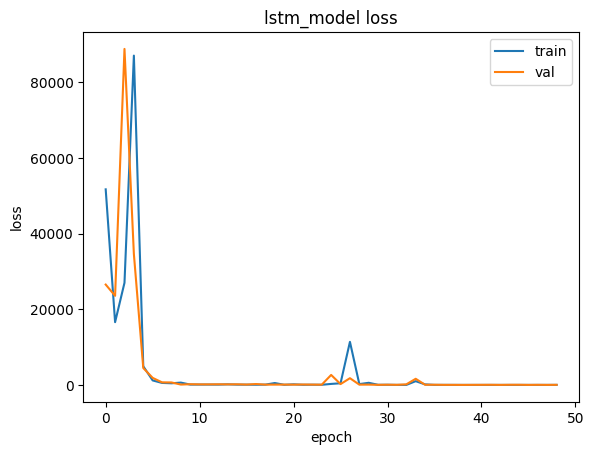

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_25_day'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='25_train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 15ms/step - loss: 40.1261 - root_mean_squared_error: 6.3345


[40.126121520996094, 6.3345184326171875]

In [ ]:
Y_pred = lstm_model.predict(X_test)

13/13 [==============================] - 1s 17ms/step


In [ ]:
Y_pred.shape

(411, 25, 1)

In [ ]:
Y_test.shape

(411, 25, 1)

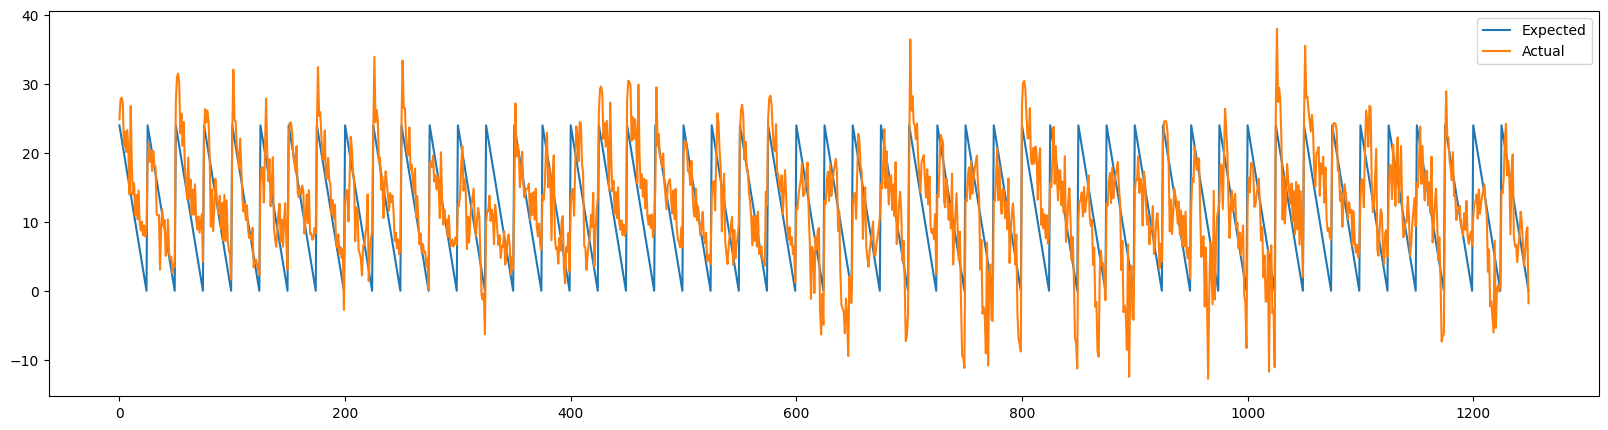

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

103/103 [==============================] - 2s 14ms/step


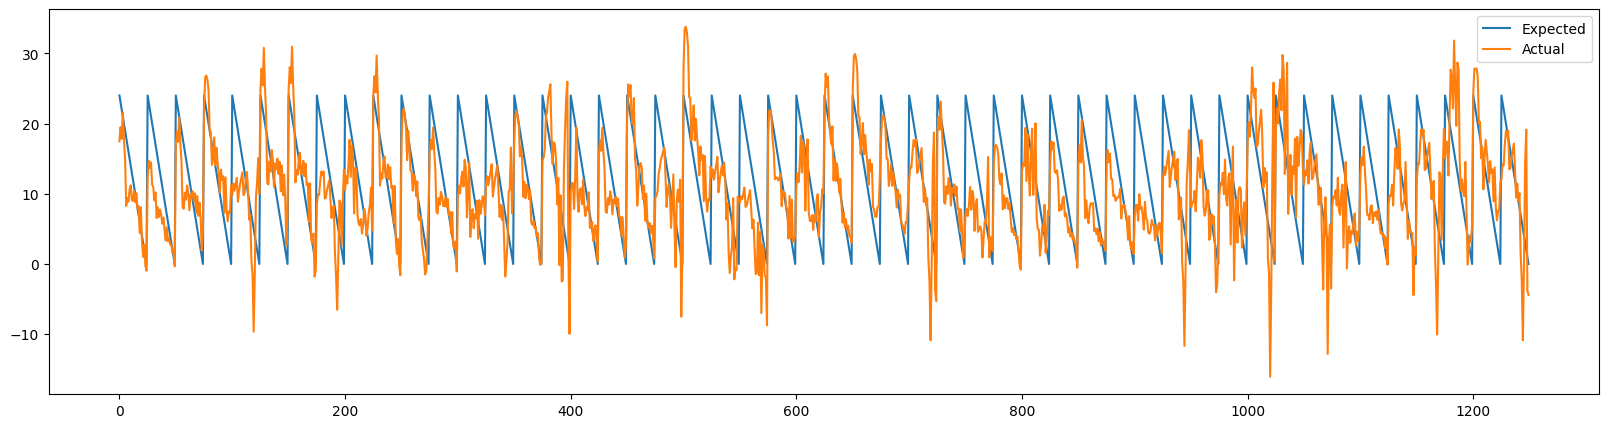

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training with Feature Selection - 25 day lookback

In [ ]:
import pandas as pd
import dask.dataframe as dd
from datetime import datetime, timedelta
from sqlalchemy.sql import select, text,column, table

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset.xlsx")

In [ ]:
ddf.shape

(102800, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ['smart_1_raw','smart_7_raw','smart_192_raw','smart_199_raw','smart_188_raw', \
        'smart_4_raw','smart_190_raw','smart_242_raw','smart_187_raw','smart_5_raw','smart_241_raw',\
        'smart_9_raw','smart_193_raw','smart_184_raw','smart_12_raw','smart_183_raw','smart_197_raw','smart_240_raw']

number_of_rows = ddf.shape[0]
time_steps = 25
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(102800, 18)
(102800, 1)
(4112, 25, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3289, 25, 18)
(411, 25, 18)
(412, 25, 18)
(3289, 25, 1)
(411, 25, 1)
(412, 25, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               47600     
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 25, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 25, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 25, 1)             101       
 ributed)                                                        
                                                                 
Total params: 128101 (500.39 KB)
Trainable params: 12810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 - 4s - loss: 1316363.2500 - root_mean_squared_error: 1147.3286 - val_loss: 49175.3203 - val_root_mean_squared_error: 221.7551 - 4s/epoch - 38ms/step
Epoch 3/100
103/103 - 5s - loss: 56106.4062 - root_mean_squared_error: 236.8679 - val_loss: 21595.4414 - val_root_mean_squared_error: 146.9539 - 5s/epoch - 48ms/step
Epoch 4/100
103/103 - 6s - loss: 196145.1094 - root_mean_squared_error: 442.8827 - val_loss: 188354.6406 - val_root_mean_squared_error: 433.9984 - 6s/epoch - 54ms/step
Epoch 5/100
103/103 - 4s - loss: 201797.9219 - root_mean_squared_error: 449.2192 - val_loss: 39352.2734 - val_root_mean_squared_error: 198.3741 - 4s/epoch - 39ms/step
Epoch 6/100
103/103 - 6s - loss: 57317.0430 - root_mean_squared_error: 239.4097 - val_loss: 18022.5723 - val_root_mean_squared_error: 134.2482 - 6s/epoch - 55ms/step
Epoch 7/100
103/103 - 4s - loss: 19143.7617 - root_mean_squared_error: 138.3610 - val_loss: 23493.7617 - val_root_mean_squared_error: 153.2767 - 4s/epoch - 38ms/step
Epoch 8/10

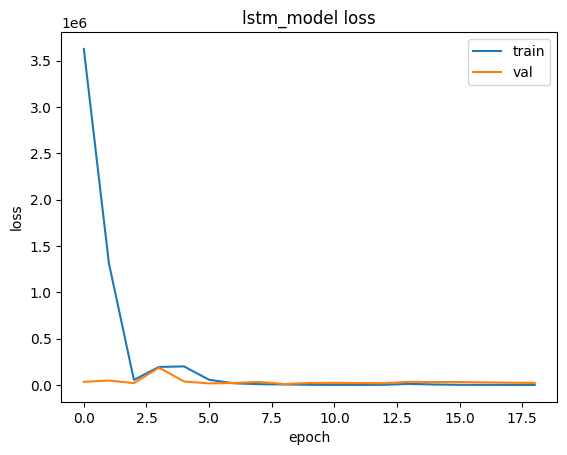

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_25_day_feature_selection'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='25_train_model_feature_selection.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 15ms/step - loss: 10059.5352 - root_mean_squared_error: 100.2972


[10059.53515625, 100.29723358154297]

In [ ]:
Y_pred = lstm_model.predict(X_test)

13/13 [==============================] - 1s 18ms/step


In [ ]:
Y_pred.shape

(411, 25, 1)

In [ ]:
Y_test.shape

(411, 25, 1)

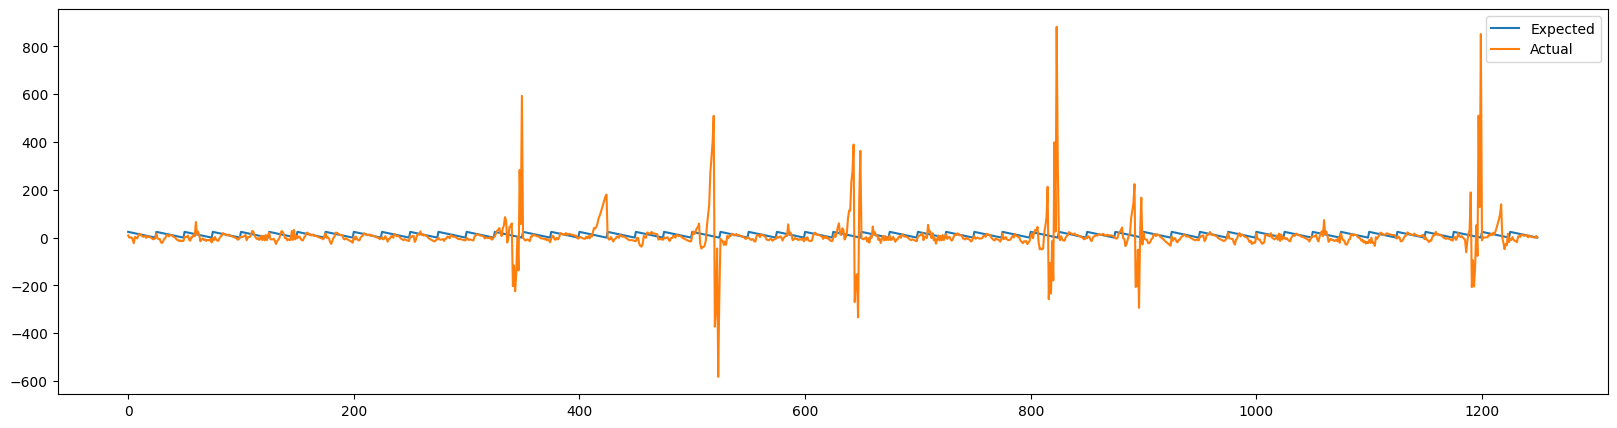

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

103/103 [==============================] - 2s 14ms/step


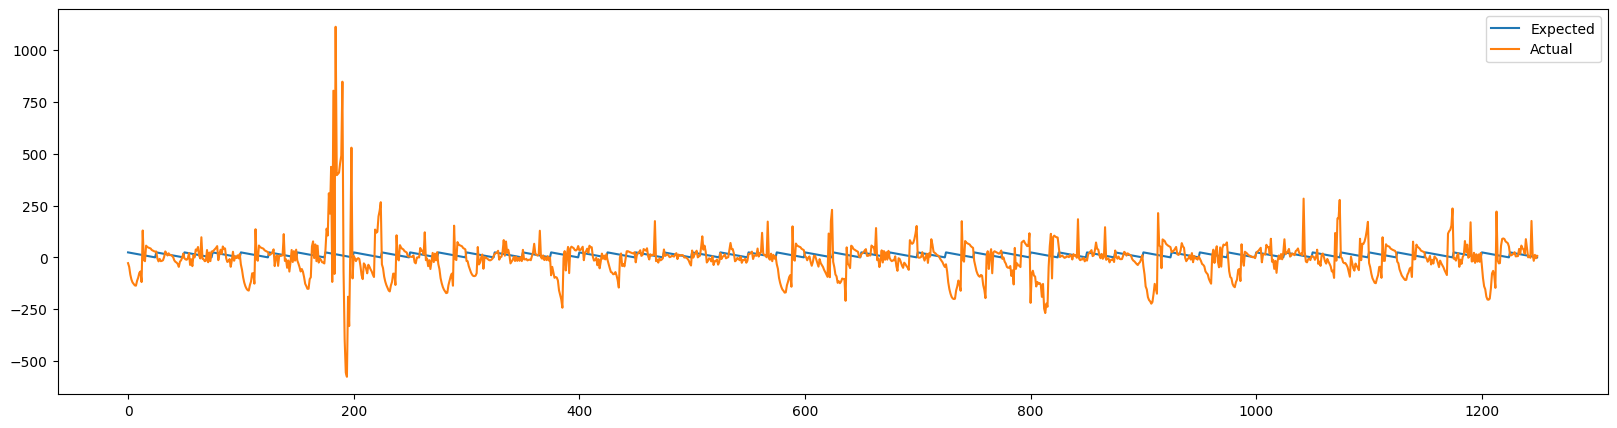

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training with Stricter Feature Selection - 25 day lookback

In [ ]:
import pandas as pd
import dask.dataframe as dd
from datetime import datetime, timedelta
from sqlalchemy.sql import select, text,column, table

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset.xlsx")

In [ ]:
ddf.shape

(102800, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ['smart_5_raw', 'smart_9_raw', 'smart_12_raw', 'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_193_raw', 'smart_197_raw', 'smart_240_raw', 'smart_241_raw']

number_of_rows = ddf.shape[0]
time_steps = 25
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(102800, 10)
(102800, 1)
(4112, 25, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3289, 25, 10)
(411, 25, 10)
(412, 25, 10)
(3289, 25, 1)
(411, 25, 1)
(412, 25, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 repeat_vector (RepeatVecto  (None, 25, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 25, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 25, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 25, 1)             101       
 ributed)                                                        
                                                                 
Total params: 124901 (487.89 KB)
Trainable params: 12490

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 - 4s - loss: 545805.8750 - root_mean_squared_error: 738.7867 - val_loss: 116037.0000 - val_root_mean_squared_error: 340.6420 - 4s/epoch - 42ms/step
Epoch 3/100
103/103 - 6s - loss: 60659.4961 - root_mean_squared_error: 246.2915 - val_loss: 21246.9160 - val_root_mean_squared_error: 145.7632 - 6s/epoch - 55ms/step
Epoch 4/100
103/103 - 5s - loss: 20560.5117 - root_mean_squared_error: 143.3893 - val_loss: 14771.6514 - val_root_mean_squared_error: 121.5387 - 5s/epoch - 44ms/step
Epoch 5/100
103/103 - 4s - loss: 9715.8379 - root_mean_squared_error: 98.5689 - val_loss: 5401.7305 - val_root_mean_squared_error: 73.4965 - 4s/epoch - 43ms/step
Epoch 6/100
103/103 - 6s - loss: 10689.5400 - root_mean_squared_error: 103.3902 - val_loss: 2726.9790 - val_root_mean_squared_error: 52.2205 - 6s/epoch - 54ms/step
Epoch 7/100
103/103 - 4s - loss: 271187.0000 - root_mean_squared_error: 520.7562 - val_loss: 18410578.0000 - val_root_mean_squared_error: 4290.7554 - 4s/epoch - 43ms/step
Epoch 8/100
103

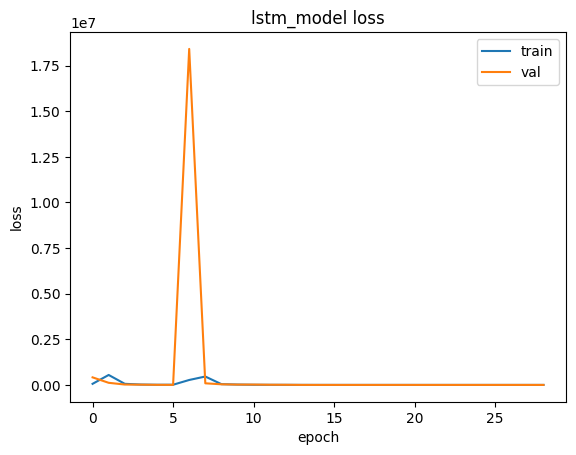

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_25_day_stricter_feature_selection'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='25_train_model_stricter_feature_selection.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 274.1345 - root_mean_squared_error: 16.5570


[274.13446044921875, 16.557004928588867]

In [ ]:
Y_pred = lstm_model.predict(X_test)

13/13 [==============================] - 1s 17ms/step


In [ ]:
Y_pred.shape

(411, 25, 1)

In [ ]:
Y_test.shape

(411, 25, 1)

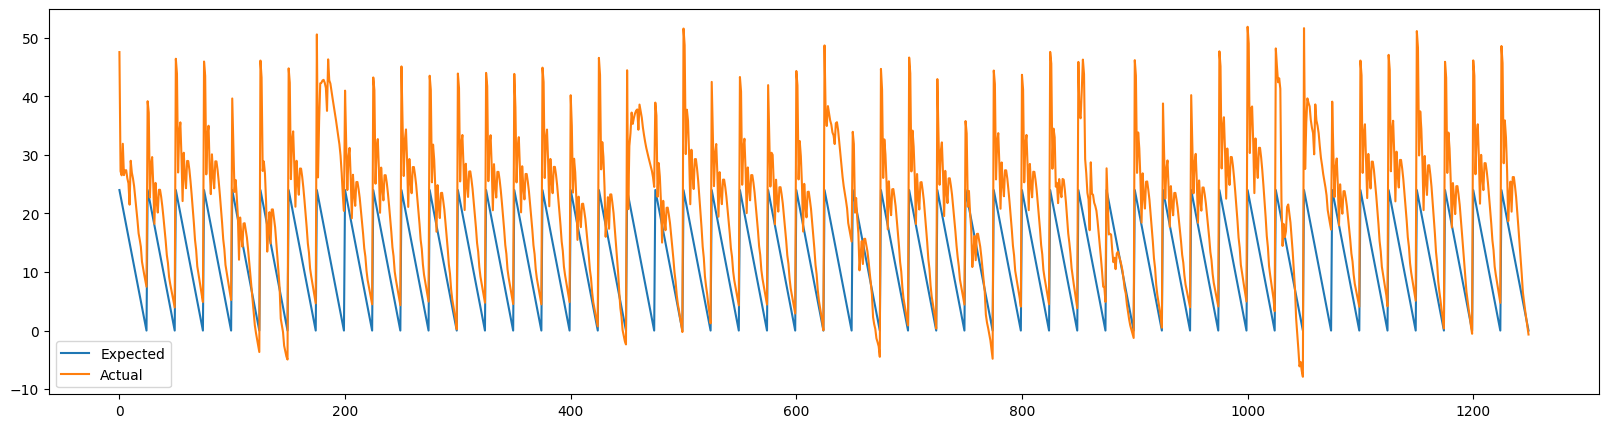

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

103/103 [==============================] - 2s 17ms/step


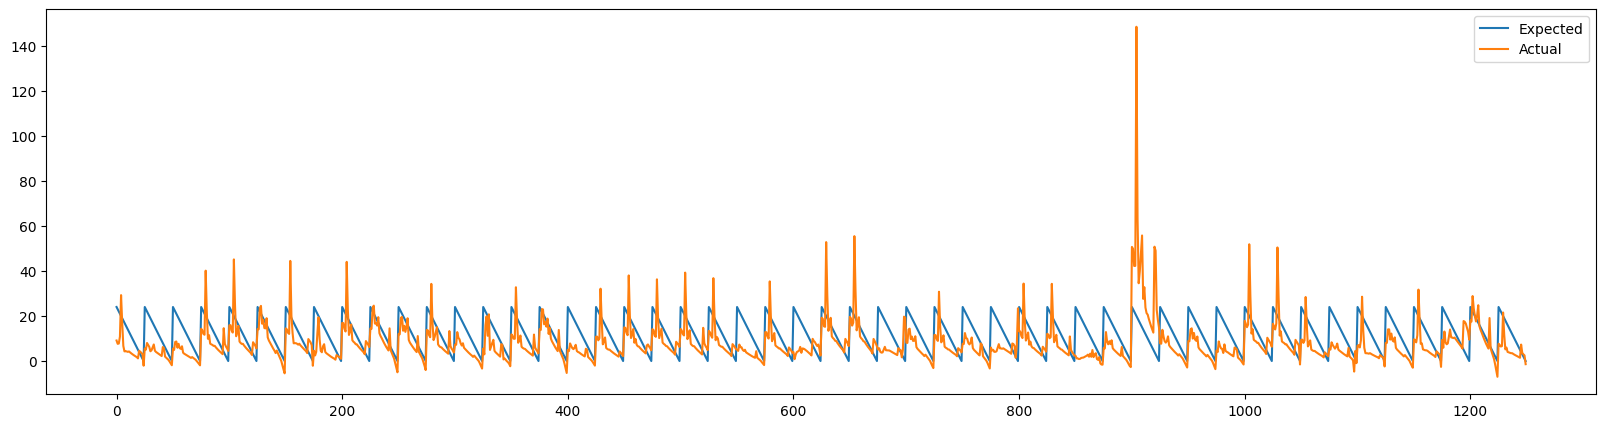

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training without Feature Selection - 5 day lookback

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_5_day.xlsx")

In [ ]:
ddf.shape

(23300, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 5
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(23300, 25)
(23300, 1)
(4660, 5, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3728, 5, 25)
(466, 5, 25)
(466, 5, 25)
(3728, 5, 1)
(466, 5, 1)
(466, 5, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 100)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


117/117 - 2s - loss: 1.6357 - root_mean_squared_error: 1.2789 - val_loss: 2.1782 - val_root_mean_squared_error: 1.4759 - 2s/epoch - 20ms/step
Epoch 3/100
117/117 - 2s - loss: 1.1536 - root_mean_squared_error: 1.0741 - val_loss: 2.2738 - val_root_mean_squared_error: 1.5079 - 2s/epoch - 17ms/step
Epoch 4/100
117/117 - 1s - loss: 0.9253 - root_mean_squared_error: 0.9619 - val_loss: 0.9796 - val_root_mean_squared_error: 0.9898 - 1s/epoch - 13ms/step
Epoch 5/100
117/117 - 2s - loss: 0.6446 - root_mean_squared_error: 0.8029 - val_loss: 0.9839 - val_root_mean_squared_error: 0.9919 - 2s/epoch - 13ms/step
Epoch 6/100
117/117 - 2s - loss: 0.7299 - root_mean_squared_error: 0.8543 - val_loss: 2.9670 - val_root_mean_squared_error: 1.7225 - 2s/epoch - 13ms/step
Epoch 7/100
117/117 - 1s - loss: 0.1900 - root_mean_squared_error: 0.4359 - val_loss: 1.5440 - val_root_mean_squared_error: 1.2426 - 1s/epoch - 12ms/step
Epoch 8/100
117/117 - 1s - loss: 0.1486 - root_mean_squared_error: 0.3855 - val_loss: 3.

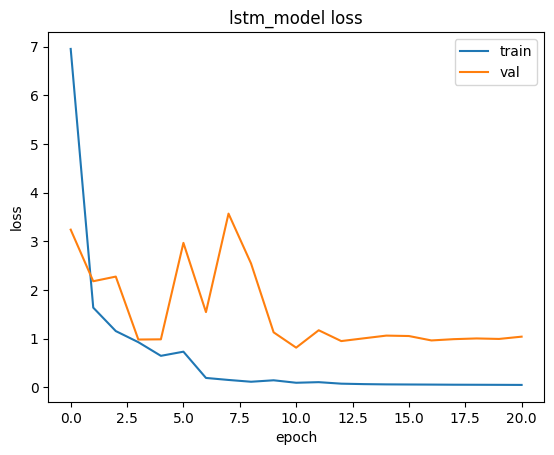

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_5_day'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='5_train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 6ms/step - loss: 0.0833 - root_mean_squared_error: 0.2886


[0.0832991749048233, 0.28861597180366516]

In [ ]:
Y_pred = lstm_model.predict(X_test)

15/15 [==============================] - 0s 5ms/step


In [ ]:
Y_pred.shape

(466, 5, 1)

In [ ]:
Y_test.shape

(466, 5, 1)

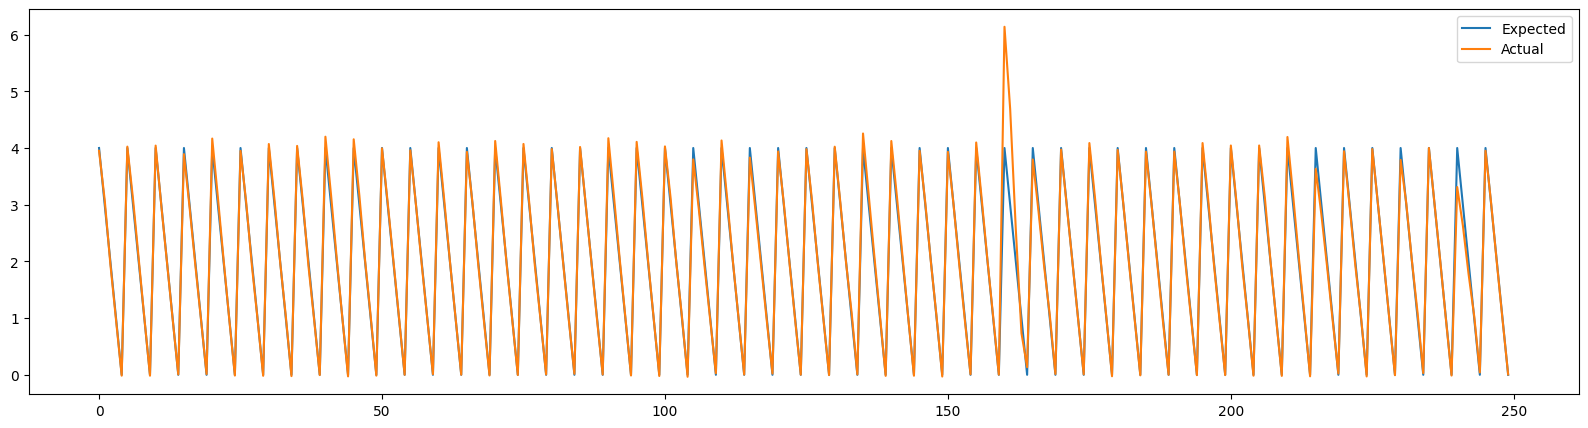

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

117/117 [==============================] - 1s 6ms/step


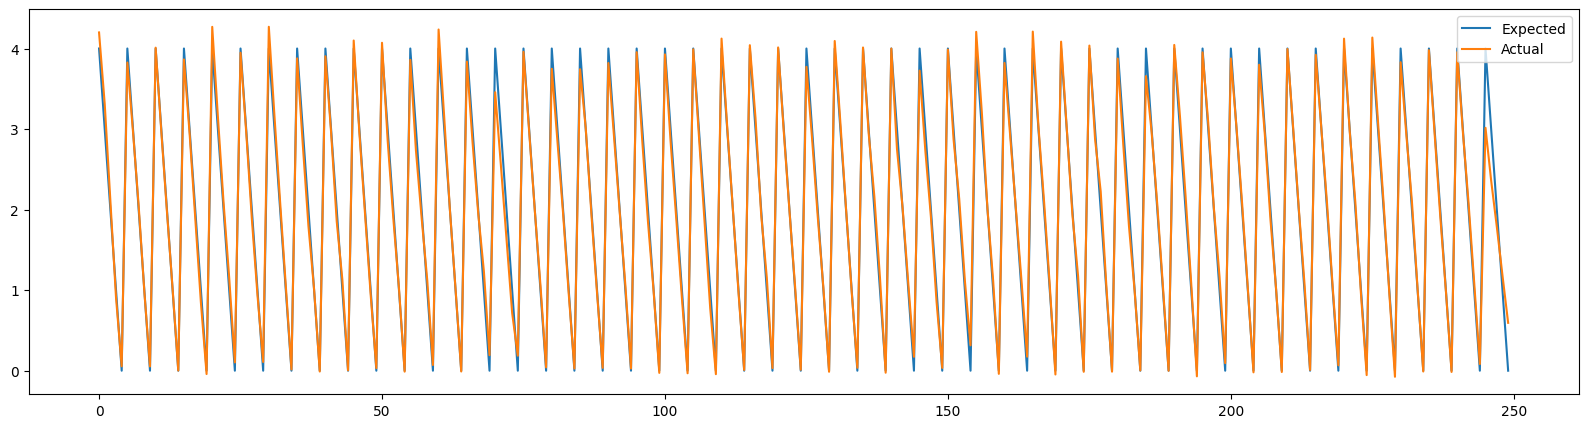

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training without Feature Selection - 15 day lookback

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_15_day.xlsx")

In [ ]:
ddf.shape

(65430, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 15
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(65430, 25)
(65430, 1)
(4362, 15, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3489, 15, 25)
(436, 15, 25)
(437, 15, 25)
(3489, 15, 1)
(436, 15, 1)
(437, 15, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 15, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 15, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 15, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 15, 1)             101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 - 3s - loss: 2468.1575 - root_mean_squared_error: 49.6805 - val_loss: 2958.4189 - val_root_mean_squared_error: 54.3913 - 3s/epoch - 32ms/step
Epoch 3/100
110/110 - 3s - loss: 708.6747 - root_mean_squared_error: 26.6210 - val_loss: 3643.5896 - val_root_mean_squared_error: 60.3621 - 3s/epoch - 31ms/step
Epoch 4/100
110/110 - 3s - loss: 566.1405 - root_mean_squared_error: 23.7937 - val_loss: 1545.7122 - val_root_mean_squared_error: 39.3155 - 3s/epoch - 26ms/step
Epoch 5/100
110/110 - 3s - loss: 143.7517 - root_mean_squared_error: 11.9896 - val_loss: 236.0659 - val_root_mean_squared_error: 15.3644 - 3s/epoch - 26ms/step
Epoch 6/100
110/110 - 3s - loss: 76.1052 - root_mean_squared_error: 8.7238 - val_loss: 120.3031 - val_root_mean_squared_error: 10.9683 - 3s/epoch - 30ms/step
Epoch 7/100
110/110 - 3s - loss: 50.4859 - root_mean_squared_error: 7.1053 - val_loss: 117.8168 - val_root_mean_squared_error: 10.8543 - 3s/epoch - 32ms/step
Epoch 8/100
110/110 - 3s - loss: 39.9725 - root_mean

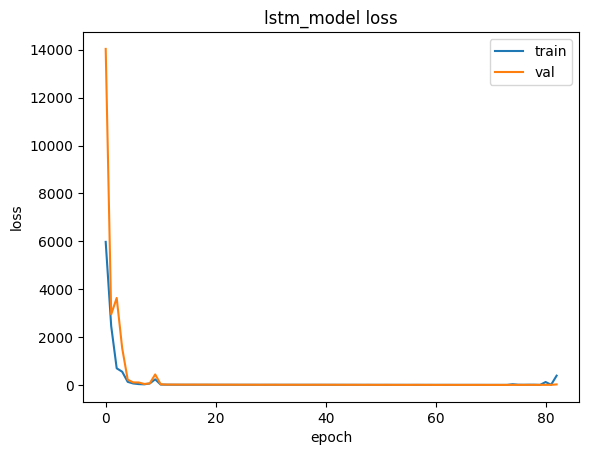

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_15_day'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='15_train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 11ms/step - loss: 24.8564 - root_mean_squared_error: 4.9856


[24.856430053710938, 4.985622406005859]

In [ ]:
Y_pred = lstm_model.predict(X_test)

14/14 [==============================] - 1s 14ms/step


In [ ]:
Y_pred.shape

(436, 15, 1)

In [ ]:
Y_test.shape

(436, 15, 1)

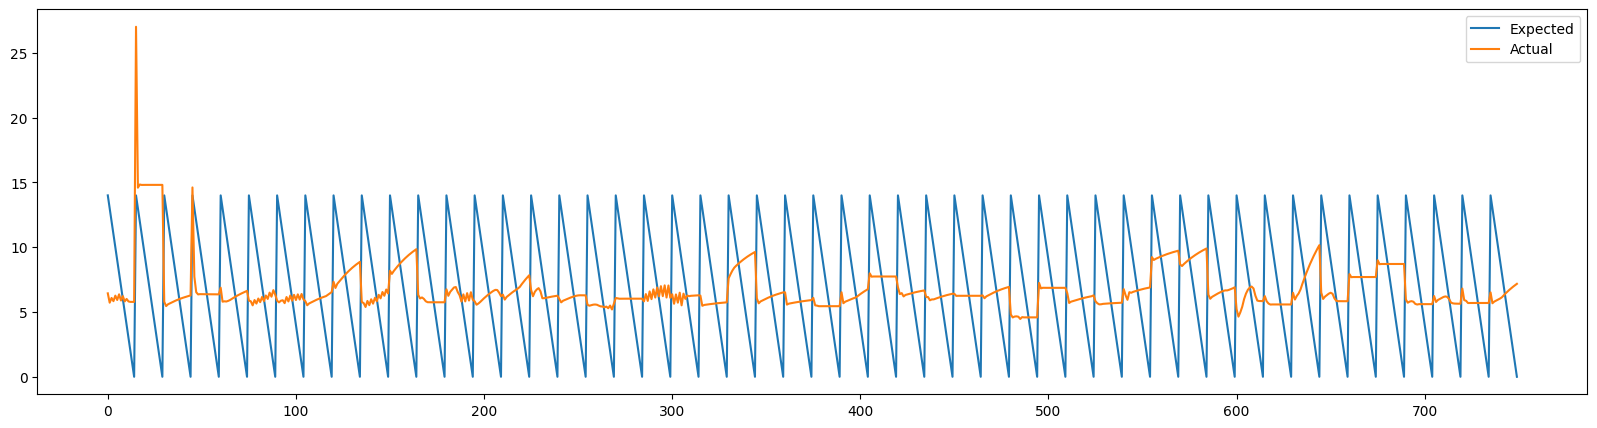

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

110/110 [==============================] - 1s 10ms/step


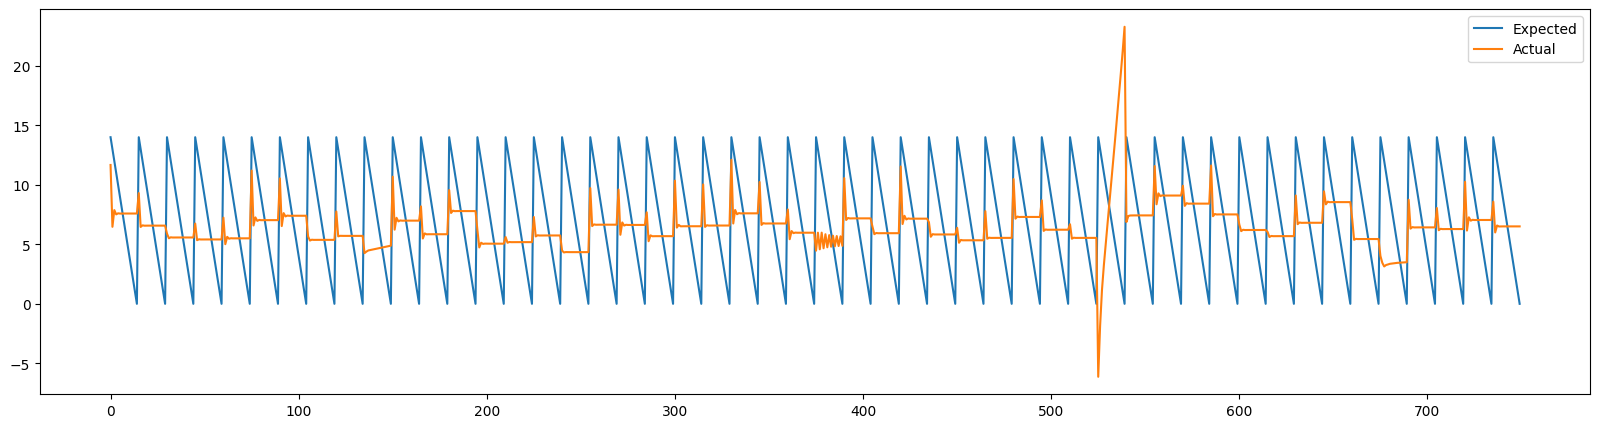

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training without Feature Selection - 35 day lookback

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_35_day.xlsx")

In [ ]:
ddf.shape

(134505, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras import optimizers

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    optimizer = optimizers.Adam(clipvalue=0.5)
    m1.compile(optimizer=optimizer, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 35
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state=SEED, shuffle=False)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=SEED, shuffle=False)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(134505, 25)
(134505, 1)
(3843, 35, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(3074, 35, 25)
(384, 35, 25)
(385, 35, 25)
(3074, 35, 1)
(384, 35, 1)
(385, 35, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 35, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 35, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 35, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 35, 1)             101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/97 - 6s - loss: 67846.5469 - root_mean_squared_error: 260.4737 - val_loss: 85516.7188 - val_root_mean_squared_error: 292.4324 - 6s/epoch - 67ms/step
Epoch 3/100
97/97 - 5s - loss: 67864.1172 - root_mean_squared_error: 260.5075 - val_loss: 18141.1660 - val_root_mean_squared_error: 134.6891 - 5s/epoch - 55ms/step
Epoch 4/100
97/97 - 6s - loss: 416257.7812 - root_mean_squared_error: 645.1805 - val_loss: 5287.7461 - val_root_mean_squared_error: 72.7169 - 6s/epoch - 66ms/step
Epoch 5/100
97/97 - 5s - loss: 76377.6406 - root_mean_squared_error: 276.3651 - val_loss: 225.9495 - val_root_mean_squared_error: 15.0316 - 5s/epoch - 56ms/step
Epoch 6/100
97/97 - 6s - loss: 250.0845 - root_mean_squared_error: 15.8141 - val_loss: 420.7307 - val_root_mean_squared_error: 20.5117 - 6s/epoch - 59ms/step
Epoch 7/100
97/97 - 6s - loss: 890.6437 - root_mean_squared_error: 29.8437 - val_loss: 535.8019 - val_root_mean_squared_error: 23.1474 - 6s/epoch - 61ms/step
Epoch 8/100
97/97 - 5s - loss: 884.7955 - ro

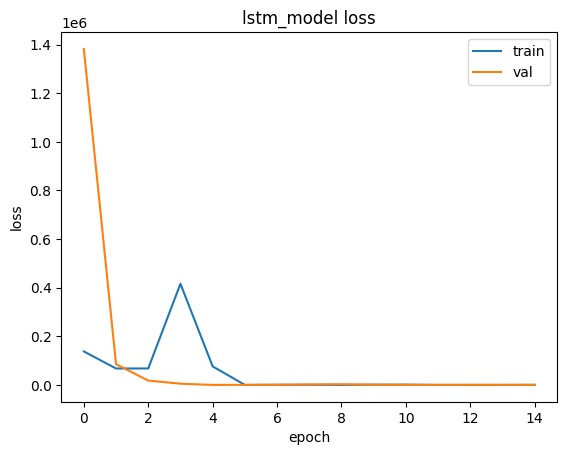

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_35_day'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='35_train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

12/12 [==============================] - 0s 24ms/step - loss: 253.4652 - root_mean_squared_error: 15.9206


[253.4652099609375, 15.9205904006958]

In [ ]:
Y_pred = lstm_model.predict(X_test)

12/12 [==============================] - 1s 22ms/step


In [ ]:
Y_pred.shape

(384, 35, 1)

In [ ]:
Y_test.shape

(384, 35, 1)

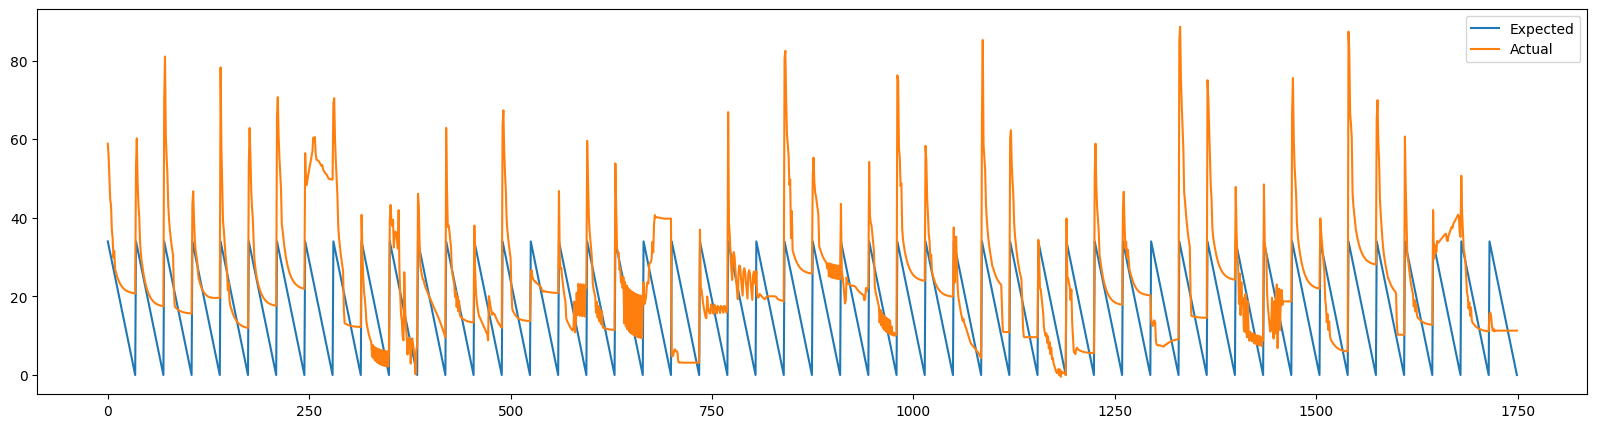

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

97/97 [==============================] - 3s 26ms/step


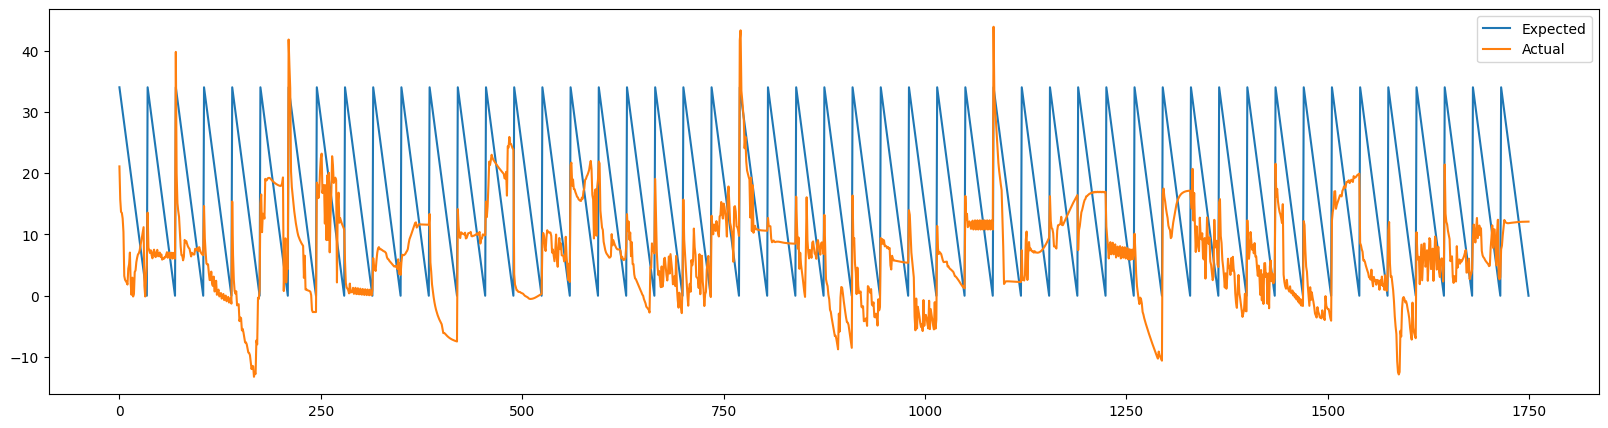

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# LSTM Training without Feature Selection - 45 day lookback

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_45_day.xlsx")

In [ ]:
ddf.shape

(161955, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    optimizer = optimizers.Adam(clipvalue=0.5)
    m1.compile(optimizer=optimizer, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 45
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.20, random_state =50)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5, random_state = 50)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(161955, 25)
(161955, 1)
(3599, 45, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(2879, 45, 25)
(360, 45, 25)
(360, 45, 25)
(2879, 45, 1)
(360, 45, 1)
(360, 45, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 45, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 45, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 45, 100)           0         
                                                                 
 time_distributed (TimeDist  (None, 45, 1)             101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 - 7s - loss: 26274526.0000 - root_mean_squared_error: 5125.8677 - val_loss: 6076517.5000 - val_root_mean_squared_error: 2465.0593 - 7s/epoch - 73ms/step
Epoch 3/100
90/90 - 6s - loss: 12541963.0000 - root_mean_squared_error: 3541.4639 - val_loss: 719638.0625 - val_root_mean_squared_error: 848.3149 - 6s/epoch - 63ms/step
Epoch 4/100
90/90 - 7s - loss: 912729.2500 - root_mean_squared_error: 955.3688 - val_loss: 281613.1562 - val_root_mean_squared_error: 530.6724 - 7s/epoch - 73ms/step
Epoch 5/100
90/90 - 6s - loss: 160129.9062 - root_mean_squared_error: 400.1624 - val_loss: 3330.7598 - val_root_mean_squared_error: 57.7127 - 6s/epoch - 64ms/step
Epoch 6/100
90/90 - 7s - loss: 19196.9199 - root_mean_squared_error: 138.5529 - val_loss: 20717.9668 - val_root_mean_squared_error: 143.9374 - 7s/epoch - 74ms/step
Epoch 7/100
90/90 - 6s - loss: 21774.2754 - root_mean_squared_error: 147.5611 - val_loss: 3774.7522 - val_root_mean_squared_error: 61.4390 - 6s/epoch - 64ms/step
Epoch 8/100
90/90

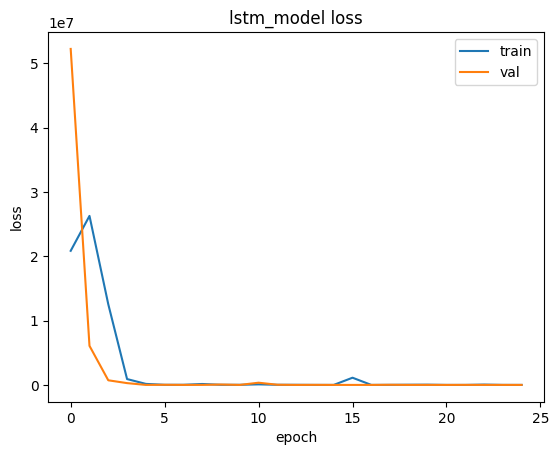

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_45_day'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='45_train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
lstm_model.evaluate(X_test,Y_test)

12/12 [==============================] - 0s 22ms/step - loss: 6384.0317 - root_mean_squared_error: 79.9001


[6384.03173828125, 79.90013122558594]

In [ ]:
Y_pred = lstm_model.predict(X_test)

12/12 [==============================] - 1s 21ms/step


In [ ]:
Y_pred.shape

(360, 45, 1)

In [ ]:
Y_test.shape

(360, 45, 1)

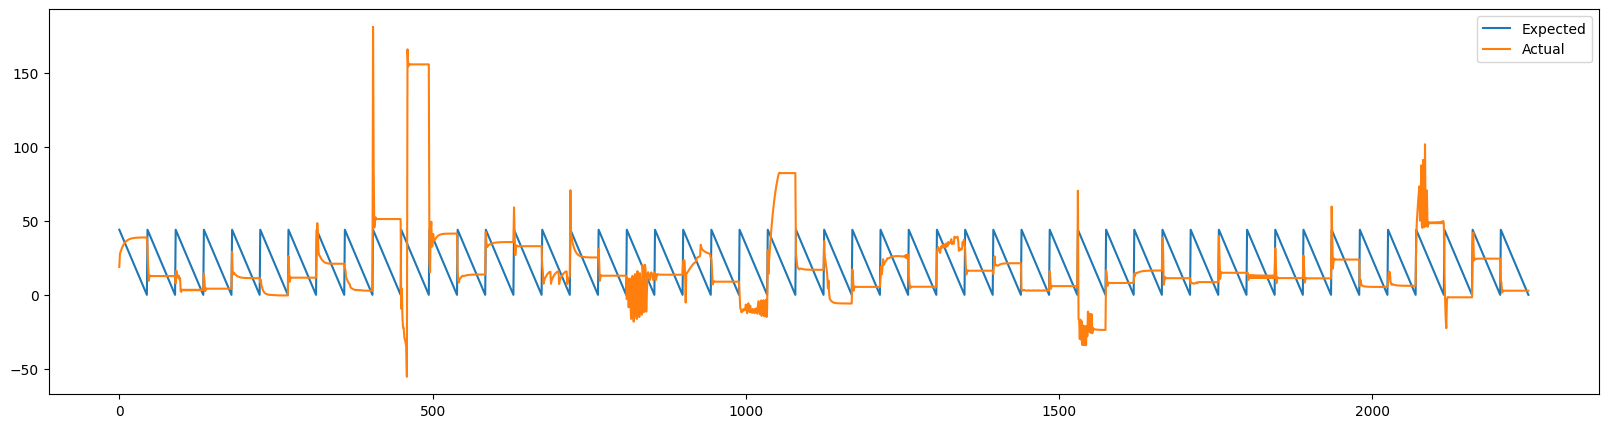

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

In [ ]:
pred_Y_train = lstm_model.predict(X_train)

90/90 [==============================] - 2s 22ms/step


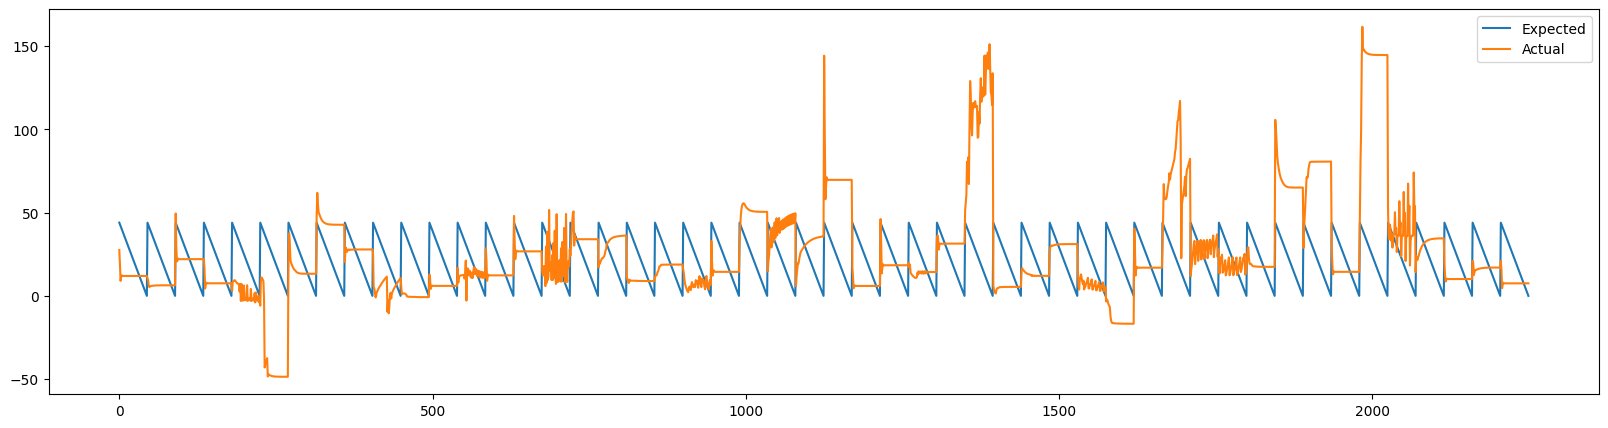

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_train[0: 50]).ravel()
actual = np.concatenate(pred_Y_train[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# Lookback worsens predictions

In [ ]:
lookback = [5,15,25,35,45]
lookback_train_rmse = [0.2156, 20.0390, 6.6315, 23.2777, 38.7680]
lookback_test_rmse = [0.2886, 4.9856, 6.3345, 15.9206, 79.9001]

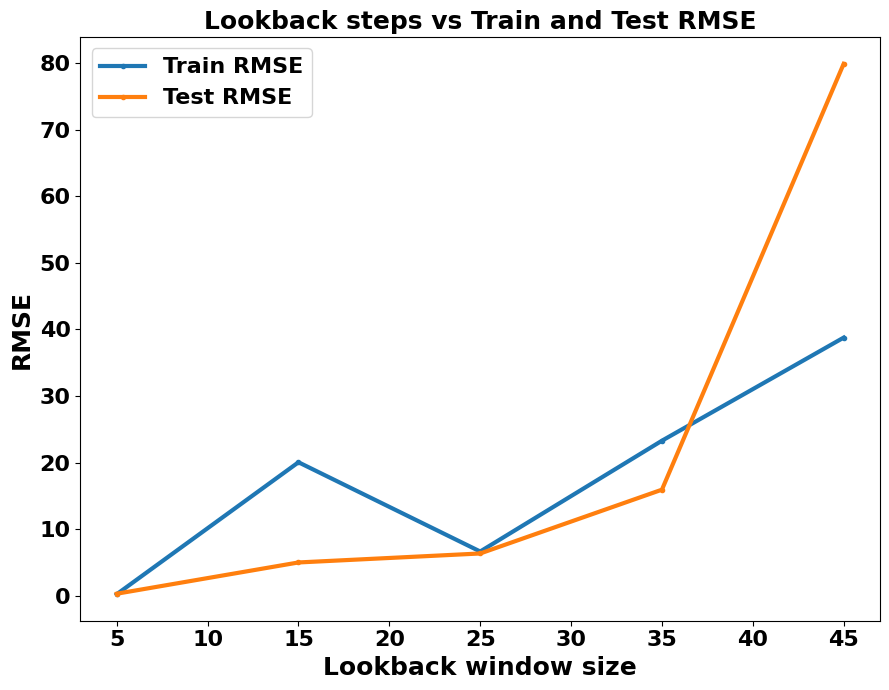

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.ylabel('RMSE', fontsize=18, fontweight='bold')
plt.xlabel('Lookback window size', fontsize=18, fontweight='bold')
plt.title("Lookback steps vs Train and Test RMSE", fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.plot(lookback, lookback_train_rmse[:], marker=".", label="Train RMSE", linewidth=3)
plt.plot(lookback, lookback_test_rmse[:], marker=".", label="Test RMSE", linewidth=3)
plt.legend(prop={'size': 16, 'weight': 'bold'})
plt.tight_layout()
plt.savefig('hdd-lookback-graph.pdf', format='pdf')
plt.show()

# 3-fold cross validation

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_5_day.xlsx")

In [ ]:
ddf.shape

(23300, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 5
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=SEED, shuffle=False)
# X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(23300, 25)
(23300, 1)
(4660, 5, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4194, 5, 25)
(466, 5, 25)
(4194, 5, 1)
(466, 5, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 100)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 - 1s - loss: 1.4227 - root_mean_squared_error: 1.1928 - val_loss: 2.3359 - val_root_mean_squared_error: 1.5284 - 654ms/epoch - 20ms/step
Epoch 3/100
33/33 - 1s - loss: 0.7375 - root_mean_squared_error: 0.8588 - val_loss: 1.8233 - val_root_mean_squared_error: 1.3503 - 821ms/epoch - 25ms/step
Epoch 4/100
33/33 - 1s - loss: 0.4165 - root_mean_squared_error: 0.6454 - val_loss: 1.4539 - val_root_mean_squared_error: 1.2058 - 803ms/epoch - 24ms/step
Epoch 5/100
33/33 - 1s - loss: 0.4254 - root_mean_squared_error: 0.6522 - val_loss: 1.3423 - val_root_mean_squared_error: 1.1586 - 828ms/epoch - 25ms/step
Epoch 6/100
33/33 - 1s - loss: 0.4119 - root_mean_squared_error: 0.6418 - val_loss: 1.2754 - val_root_mean_squared_error: 1.1294 - 639ms/epoch - 19ms/step
Epoch 7/100
33/33 - 1s - loss: 0.3627 - root_mean_squared_error: 0.6023 - val_loss: 1.0809 - val_root_mean_squared_error: 1.0397 - 632ms/epoch - 19ms/step
Epoch 8/100
33/33 - 1s - loss: 0.1869 - root_mean_squared_error: 0.4323 - val_loss

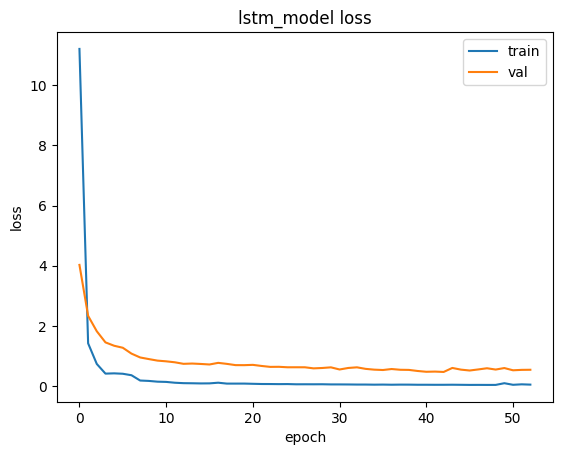

Fold 1:
  Train: index=[   0    1    2 ... 2095 2096 2097]
  Test:  index=[2098 2099 2100 ... 3143 3144 3145]
(2097, 5, 25)
(4194, 5, 1)
Epoch 1/100
66/66 - 1s - loss: 0.2018 - root_mean_squared_error: 0.4492 - val_loss: 1.8714 - val_root_mean_squared_error: 1.3680 - 826ms/epoch - 13ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 - 1s - loss: 0.0548 - root_mean_squared_error: 0.2341 - val_loss: 0.5896 - val_root_mean_squared_error: 0.7679 - 769ms/epoch - 12ms/step
Epoch 3/100
66/66 - 1s - loss: 1.1524 - root_mean_squared_error: 1.0735 - val_loss: 0.6536 - val_root_mean_squared_error: 0.8085 - 735ms/epoch - 11ms/step
Epoch 4/100
66/66 - 1s - loss: 0.1148 - root_mean_squared_error: 0.3388 - val_loss: 2.3773 - val_root_mean_squared_error: 1.5419 - 768ms/epoch - 12ms/step
Epoch 5/100
66/66 - 1s - loss: 0.0761 - root_mean_squared_error: 0.2759 - val_loss: 1.9921 - val_root_mean_squared_error: 1.4114 - 824ms/epoch - 12ms/step
Epoch 6/100
66/66 - 1s - loss: 0.0756 - root_mean_squared_error: 0.2749 - val_loss: 0.4167 - val_root_mean_squared_error: 0.6455 - 751ms/epoch - 11ms/step
Epoch 7/100
66/66 - 1s - loss: 0.0464 - root_mean_squared_error: 0.2153 - val_loss: 0.9474 - val_root_mean_squared_error: 0.9734 - 1s/epoch - 17ms/step
Epoch 8/100
66/66 - 1s - loss: 0.0413 - root_mean_squared_error: 0.2032 - val_loss: 0

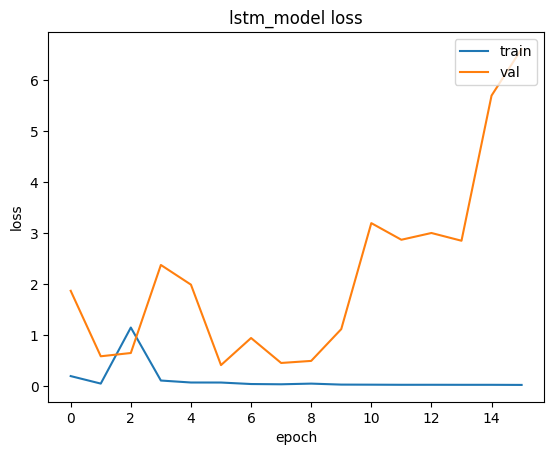

Fold 2:
  Train: index=[   0    1    2 ... 3143 3144 3145]
  Test:  index=[3146 3147 3148 ... 4191 4192 4193]
(3145, 5, 25)
(4194, 5, 1)
Epoch 1/100
99/99 - 1s - loss: 0.1214 - root_mean_squared_error: 0.3485 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690 - 1s/epoch - 11ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 - 1s - loss: 0.0505 - root_mean_squared_error: 0.2247 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028 - 995ms/epoch - 10ms/step
Epoch 3/100
99/99 - 2s - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466 - 2s/epoch - 15ms/step
Epoch 4/100
99/99 - 1s - loss: 0.0337 - root_mean_squared_error: 0.1835 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2042 - 1s/epoch - 14ms/step
Epoch 5/100
99/99 - 1s - loss: 0.2510 - root_mean_squared_error: 0.5010 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989 - 1s/epoch - 15ms/step
Epoch 6/100
99/99 - 1s - loss: 0.0548 - root_mean_squared_error: 0.2340 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2185 - 977ms/epoch - 10ms/step
Epoch 7/100
99/99 - 1s - loss: 0.0376 - root_mean_squared_error: 0.1939 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2115 - 998ms/epoch - 10ms/step
Epoch 8/100
99/99 - 1s - loss: 0.0354 - root_mean_squared_error: 0.1882 - val_loss: 0.0409 

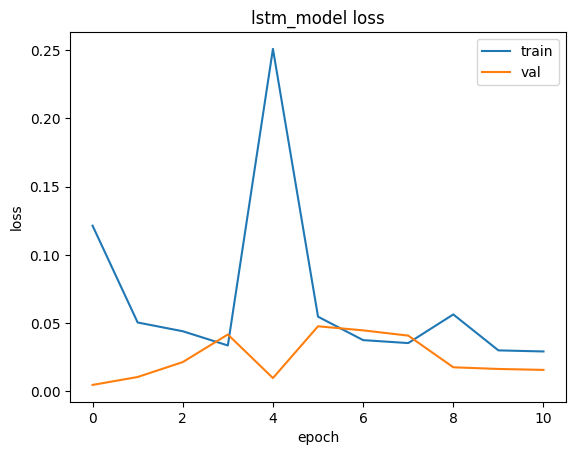

Train RMSE [0.09269720315933228, 0.0655926987528801, 0.04488792642951012]
Validation RMSE [0.7378288507461548, 2.570439577102661, 0.12555578351020813]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_3_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='3_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = X_train[:train_index[-1]]
  train_y = Y_train[:train_index[-1]]
  print(train_X.shape)
  val_X = X_train[test_index[-1]:]
  val_y = Y_train[test_index[-1]:]
  print(Y_train.shape)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  rmse_train.append(lstm_model.evaluate(train_X, train_y)[1])

  rmse_val.append(lstm_model.evaluate(val_X, val_y)[1])

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.06772594278057416
Validation RMSE 1.144608070453008


In [ ]:
lstm_model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 5ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084


[0.09511659294366837, 0.30840978026390076]

In [ ]:
Y_pred = lstm_model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


In [ ]:
Y_pred.shape

(466, 5, 1)

In [ ]:
Y_test.shape

(466, 5, 1)

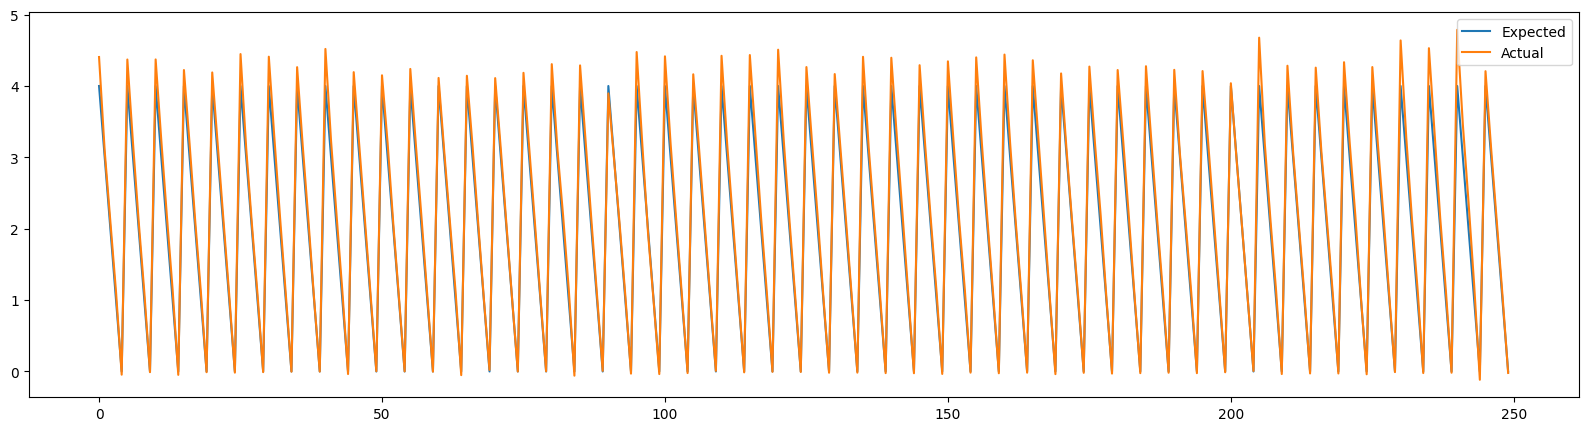

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# 5-fold cross validation

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_5_day.xlsx")

In [ ]:
ddf.shape

(23300, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 5
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=SEED, shuffle=False)
# X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(23300, 25)
(23300, 1)
(4660, 5, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4194, 5, 25)
(466, 5, 25)
(4194, 5, 1)
(466, 5, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 100)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 - 1s - loss: 1.8354 - root_mean_squared_error: 1.3548 - val_loss: 5.9048 - val_root_mean_squared_error: 2.4300 - 757ms/epoch - 34ms/step
Epoch 3/100
22/22 - 1s - loss: 0.8787 - root_mean_squared_error: 0.9374 - val_loss: 4.0114 - val_root_mean_squared_error: 2.0028 - 927ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5578 - root_mean_squared_error: 0.7469 - val_loss: 2.7892 - val_root_mean_squared_error: 1.6701 - 909ms/epoch - 41ms/step
Epoch 5/100
22/22 - 1s - loss: 0.5254 - root_mean_squared_error: 0.7249 - val_loss: 3.0422 - val_root_mean_squared_error: 1.7442 - 669ms/epoch - 30ms/step
Epoch 6/100
22/22 - 1s - loss: 0.4716 - root_mean_squared_error: 0.6867 - val_loss: 1.4912 - val_root_mean_squared_error: 1.2212 - 914ms/epoch - 42ms/step
Epoch 7/100
22/22 - 1s - loss: 2.0466 - root_mean_squared_error: 1.4306 - val_loss: 2.1819 - val_root_mean_squared_error: 1.4771 - 679ms/epoch - 31ms/step
Epoch 8/100
22/22 - 1s - loss: 13.5714 - root_mean_squared_error: 3.6839 - val_los

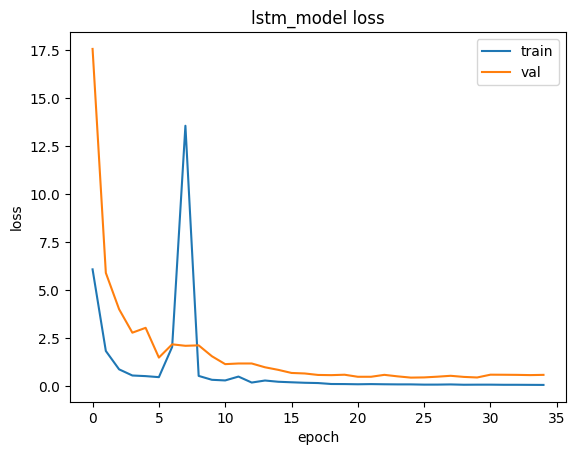

Fold 1:
  Train: index=[   0    1    2 ... 1395 1396 1397]
  Test:  index=[1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411
 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425
 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467
 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481
 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509
 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523
 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537
 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551
 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565
 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579
 15

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 - 1s - loss: 0.9993 - root_mean_squared_error: 0.9996 - val_loss: 0.4906 - val_root_mean_squared_error: 0.7005 - 819ms/epoch - 19ms/step
Epoch 3/100
44/44 - 1s - loss: 2.4069 - root_mean_squared_error: 1.5514 - val_loss: 0.7459 - val_root_mean_squared_error: 0.8636 - 1s/epoch - 26ms/step
Epoch 4/100
44/44 - 1s - loss: 0.7995 - root_mean_squared_error: 0.8941 - val_loss: 0.5654 - val_root_mean_squared_error: 0.7519 - 1s/epoch - 33ms/step
Epoch 5/100
44/44 - 1s - loss: 6.3130 - root_mean_squared_error: 2.5126 - val_loss: 0.6765 - val_root_mean_squared_error: 0.8225 - 960ms/epoch - 22ms/step
Epoch 6/100
44/44 - 1s - loss: 1.5363 - root_mean_squared_error: 1.2395 - val_loss: 0.1579 - val_root_mean_squared_error: 0.3974 - 878ms/epoch - 20ms/step
Epoch 7/100
44/44 - 1s - loss: 0.4294 - root_mean_squared_error: 0.6553 - val_loss: 0.1865 - val_root_mean_squared_error: 0.4319 - 1s/epoch - 27ms/step
Epoch 8/100
44/44 - 1s - loss: 0.1093 - root_mean_squared_error: 0.3306 - val_loss: 0.1398 

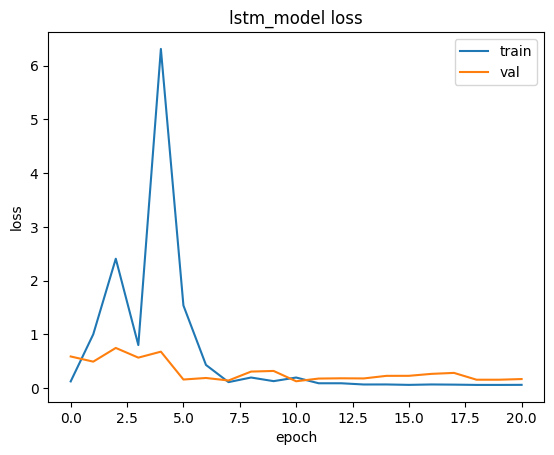

Fold 2:
  Train: index=[   0    1    2 ... 2094 2095 2096]
  Test:  index=[2097 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110
 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124
 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138
 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152
 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166
 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180
 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194
 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208
 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222
 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236
 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250
 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264
 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278
 22

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 - 2s - loss: 0.0475 - root_mean_squared_error: 0.2180 - val_loss: 0.1722 - val_root_mean_squared_error: 0.4150 - 2s/epoch - 24ms/step
Epoch 3/100
66/66 - 1s - loss: 0.0493 - root_mean_squared_error: 0.2221 - val_loss: 0.2151 - val_root_mean_squared_error: 0.4638 - 1s/epoch - 19ms/step
Epoch 4/100
66/66 - 1s - loss: 0.0447 - root_mean_squared_error: 0.2114 - val_loss: 0.1887 - val_root_mean_squared_error: 0.4344 - 1s/epoch - 17ms/step
Epoch 5/100
66/66 - 1s - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.2312 - val_root_mean_squared_error: 0.4808 - 1s/epoch - 15ms/step
Epoch 6/100
66/66 - 1s - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.2798 - val_root_mean_squared_error: 0.5290 - 998ms/epoch - 15ms/step
Epoch 7/100
66/66 - 1s - loss: 0.0443 - root_mean_squared_error: 0.2105 - val_loss: 0.2987 - val_root_mean_squared_error: 0.5465 - 997ms/epoch - 15ms/step
Epoch 8/100
66/66 - 1s - loss: 0.0454 - root_mean_squared_error: 0.2131 - val_loss: 0.4427 - v

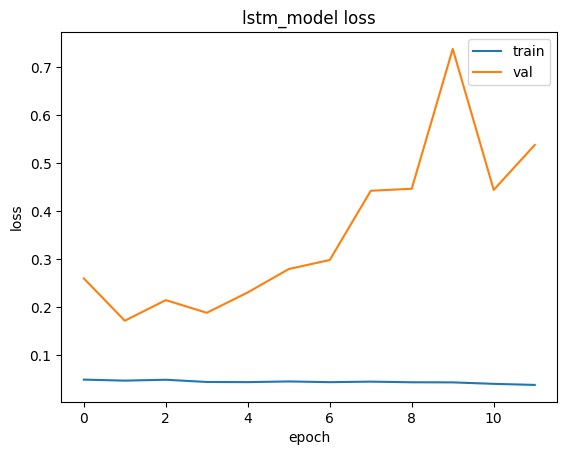

Fold 3:
  Train: index=[   0    1    2 ... 2793 2794 2795]
  Test:  index=[2796 2797 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809
 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823
 2824 2825 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837
 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851
 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865
 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879
 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893
 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907
 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 2921
 2922 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935
 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948 2949
 2950 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961 2962 2963
 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976 2977
 29

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 - 1s - loss: 0.0432 - root_mean_squared_error: 0.2079 - val_loss: 1.0184 - val_root_mean_squared_error: 1.0091 - 1s/epoch - 12ms/step
Epoch 3/100
88/88 - 1s - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1827 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.0390 - root_mean_squared_error: 0.1974 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2138 - 1s/epoch - 13ms/step
Epoch 5/100
88/88 - 1s - loss: 0.0393 - root_mean_squared_error: 0.1983 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2000 - 1s/epoch - 12ms/step
Epoch 6/100
88/88 - 1s - loss: 0.0392 - root_mean_squared_error: 0.1979 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374 - 1s/epoch - 13ms/step
Epoch 7/100
88/88 - 1s - loss: 0.0336 - root_mean_squared_error: 0.1832 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1265 - 1s/epoch - 17ms/step
Epoch 8/100
88/88 - 2s - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 0.0245 - val_roo

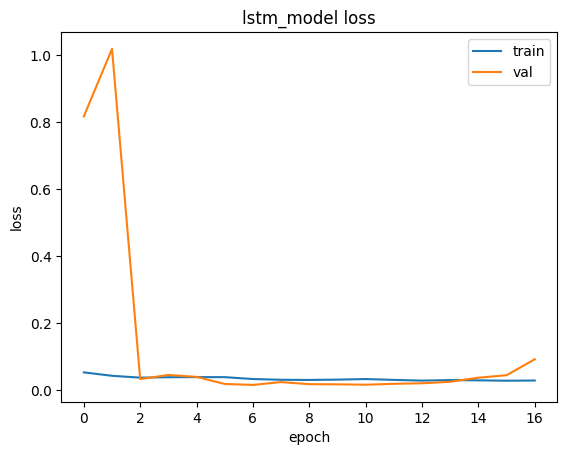

Fold 4:
  Train: index=[   0    1    2 ... 3492 3493 3494]
  Test:  index=[3495 3496 3497 3498 3499 3500 3501 3502 3503 3504 3505 3506 3507 3508
 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522
 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536
 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550
 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564
 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578
 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592
 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606
 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620
 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634
 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648
 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662
 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676
 36

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 - 1s - loss: 0.0478 - root_mean_squared_error: 0.2187 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0787 - 1s/epoch - 11ms/step
Epoch 3/100
110/110 - 1s - loss: 0.0328 - root_mean_squared_error: 0.1811 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0788 - 1s/epoch - 11ms/step
Epoch 4/100
110/110 - 1s - loss: 0.0394 - root_mean_squared_error: 0.1984 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550 - 1s/epoch - 11ms/step
Epoch 5/100
110/110 - 1s - loss: 0.0438 - root_mean_squared_error: 0.2094 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494 - 1s/epoch - 11ms/step
Epoch 6/100
110/110 - 2s - loss: 0.0318 - root_mean_squared_error: 0.1784 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734 - 2s/epoch - 14ms/step
Epoch 7/100
110/110 - 2s - loss: 0.0285 - root_mean_squared_error: 0.1689 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109 - 2s/epoch - 18ms/step
Epoch 8/100
110/110 - 1s - loss: 0.0276 - root_mean_squared_error: 0.1661 - val_loss: 0.

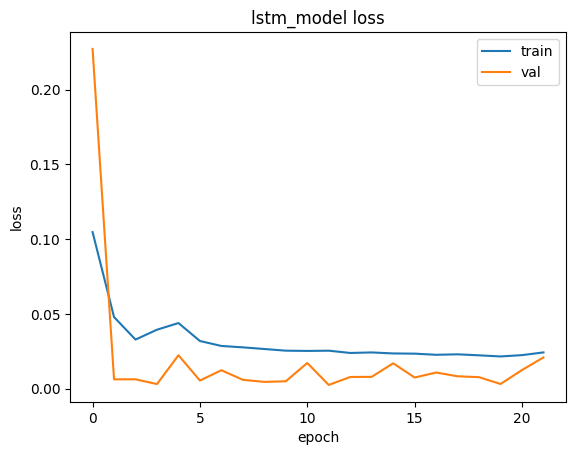

Train RMSE [0.12210007011890411, 0.09510587155818939, 0.07546541094779968, 0.0692671611905098, 0.04212774708867073]
Validation RMSE [0.7686705589294434, 0.4081195294857025, 0.7335980534553528, 0.30428701639175415, 0.1443483531475067]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_5_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='5_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = X_train[:train_index[-1]]
  train_y = Y_train[:train_index[-1]]
  print(train_X.shape)
  val_X = X_train[test_index[-1]:]
  val_y = Y_train[test_index[-1]:]
  print(Y_train.shape)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  rmse_train.append(lstm_model.evaluate(train_X, train_y)[1])

  rmse_val.append(lstm_model.evaluate(val_X, val_y)[1])

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.08081325218081474
Validation RMSE 0.4718047022819519


In [ ]:
lstm_model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 5ms/step - loss: 0.0435 - root_mean_squared_error: 0.2085


[0.04349064826965332, 0.20854412019252777]

In [ ]:
Y_pred = lstm_model.predict(X_test)

15/15 [==============================] - 1s 7ms/step


In [ ]:
Y_pred.shape

(466, 5, 1)

In [ ]:
Y_test.shape

(466, 5, 1)

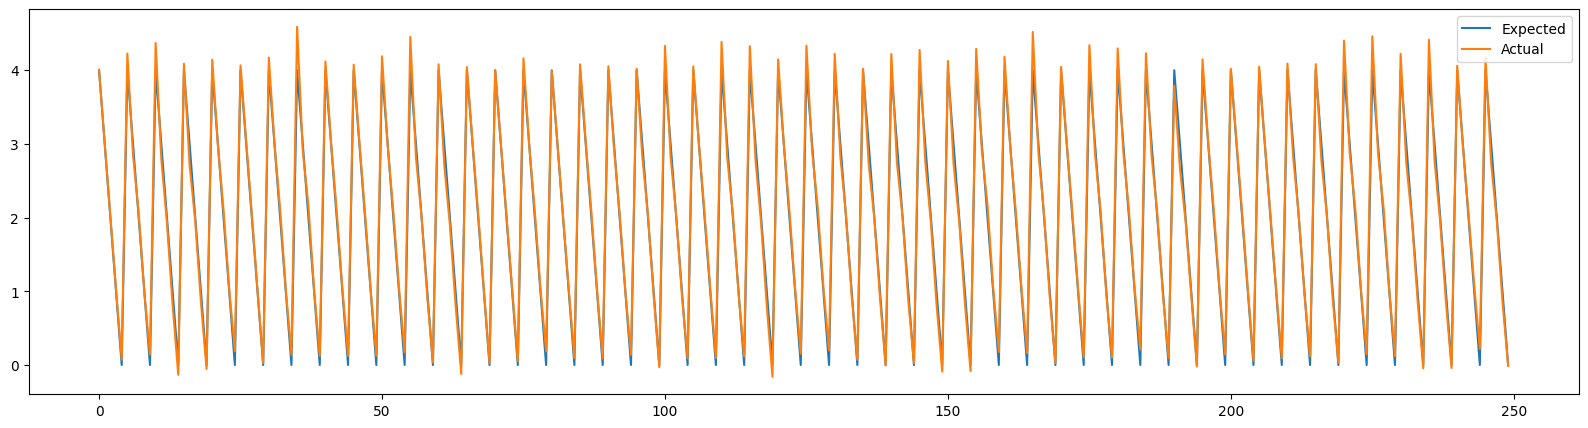

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()

# 10-fold cross validation

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
ddf = pd.read_excel("hdd_dataset_5_day.xlsx")

In [ ]:
ddf.shape

(23300, 32)

In [ ]:
ddf.columns[6:-1]

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(RepeatVector(t_steps))
    m1.add(LSTM(100, activation='relu', return_sequences=True))
    m1.add(Dropout(0.10))
    m1.add(TimeDistributed(Dense(1)))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))

print(ddf[ddf.isnull().any(axis=1)])

cols = ddf.columns[6:-1]

number_of_rows = ddf.shape[0]
time_steps = 5
batch_size = 30
number_of_columns = len(cols)
X = ddf[cols].to_numpy()
Y = ddf[['rul']].to_numpy()

print(X.shape)
print(Y.shape)

X_svr = X.copy()
Y_svr = Y.copy()

# transform data
X = scaler.fit_transform(X)

X = X.reshape((int(number_of_rows/time_steps), time_steps, number_of_columns))
Y = Y.reshape((int(Y.shape[0]/time_steps), time_steps, 1))
# Y = Y[:, -1, :].reshape(-1, 1, 1)

print(Y.shape)

SEED = 50
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=SEED, shuffle=False)
# X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)

Empty DataFrame
Columns: [Unnamed: 0, index, date, serial_number, model, capacity_bytes, failure, smart_1_raw, smart_3_raw, smart_4_raw, smart_5_raw, smart_7_raw, smart_9_raw, smart_10_raw, smart_12_raw, smart_183_raw, smart_184_raw, smart_187_raw, smart_188_raw, smart_189_raw, smart_190_raw, smart_191_raw, smart_192_raw, smart_193_raw, smart_194_raw, smart_197_raw, smart_198_raw, smart_199_raw, smart_240_raw, smart_241_raw, smart_242_raw, rul]
Index: []

[0 rows x 32 columns]
(23300, 25)
(23300, 1)
(4660, 5, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4194, 5, 25)
(466, 5, 25)
(4194, 5, 1)
(466, 5, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 100)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 time_distributed (TimeDist  (None, 5, 1)              101       
 ributed)                                                        
                                                                 
Total params: 130901 (511.33 KB)
Trainable params: 13090

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 - 2s - loss: 15.3586 - root_mean_squared_error: 3.9190 - val_loss: 17.3611 - val_root_mean_squared_error: 4.1667 - 2s/epoch - 137ms/step
Epoch 3/100
12/12 - 2s - loss: 8.5330 - root_mean_squared_error: 2.9211 - val_loss: 12.2135 - val_root_mean_squared_error: 3.4948 - 2s/epoch - 161ms/step
Epoch 4/100
12/12 - 2s - loss: 5.8030 - root_mean_squared_error: 2.4089 - val_loss: 8.9429 - val_root_mean_squared_error: 2.9905 - 2s/epoch - 160ms/step
Epoch 5/100
12/12 - 2s - loss: 5.4018 - root_mean_squared_error: 2.3242 - val_loss: 7.6452 - val_root_mean_squared_error: 2.7650 - 2s/epoch - 146ms/step
Epoch 6/100
12/12 - 1s - loss: 2.9614 - root_mean_squared_error: 1.7209 - val_loss: 6.5020 - val_root_mean_squared_error: 2.5499 - 905ms/epoch - 75ms/step
Epoch 7/100
12/12 - 2s - loss: 2.6008 - root_mean_squared_error: 1.6127 - val_loss: 5.6704 - val_root_mean_squared_error: 2.3813 - 2s/epoch - 132ms/step
Epoch 8/100
12/12 - 2s - loss: 1.8141 - root_mean_squared_error: 1.3469 - val_loss: 5.208

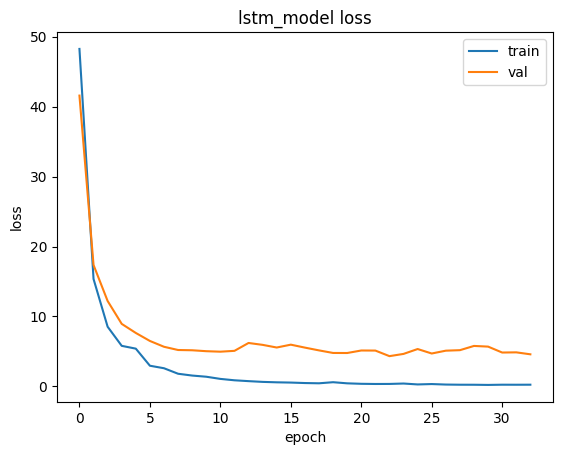

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 - 1s - loss: 0.2797 - root_mean_squared_error: 0.5289 - val_loss: 3.5070 - val_root_mean_squared_error: 1.8727 - 1s/epoch - 42ms/step
Epoch 3/100
24/24 - 1s - loss: 0.3085 - root_mean_squared_error: 0.5555 - val_loss: 3.1530 - val_root_mean_squared_error: 1.7757 - 990ms/epoch - 41ms/step
Epoch 4/100
24/24 - 1s - loss: 0.2181 - root_mean_squared_error: 0.4670 - val_loss: 2.8676 - val_root_mean_squared_error: 1.6934 - 959ms/epoch - 40ms/step
Epoch 5/100
24/24 - 1s - loss: 0.1992 - root_mean_squared_error: 0.4463 - val_loss: 2.8489 - val_root_mean_squared_error: 1.6879 - 928ms/epoch - 39ms/step
Epoch 6/100
24/24 - 1s - loss: 0.1720 - root_mean_squared_error: 0.4147 - val_loss: 3.0559 - val_root_mean_squared_error: 1.7481 - 939ms/epoch - 39ms/step
Epoch 7/100
24/24 - 1s - loss: 0.2195 - root_mean_squared_error: 0.4685 - val_loss: 3.2731 - val_root_mean_squared_error: 1.8092 - 930ms/epoch - 39ms/step
Epoch 8/100
24/24 - 1s - loss: 0.1775 - root_mean_squared_error: 0.4213 - val_loss: 3

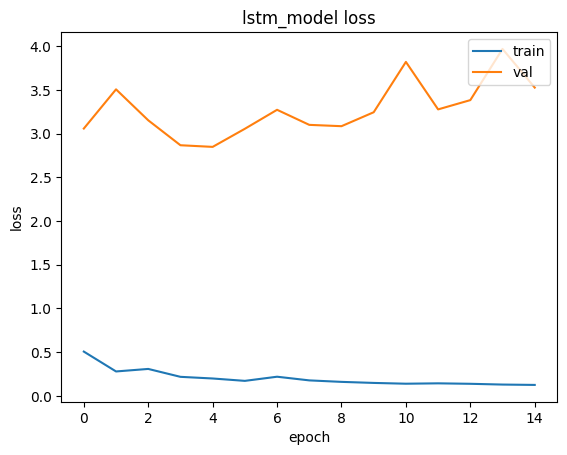

Fold 2:
  Train: index=[   0    1    2 ... 1143 1144 1145]
  Test:  index=[1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159
 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173
 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187
 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201
 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215
 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229
 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243
 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257
 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271
 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285
 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299
 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313
 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327
 13

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 - 1s - loss: 0.1538 - root_mean_squared_error: 0.3922 - val_loss: 2.0962 - val_root_mean_squared_error: 1.4478 - 1s/epoch - 40ms/step
Epoch 3/100
36/36 - 1s - loss: 0.2861 - root_mean_squared_error: 0.5349 - val_loss: 1.3547 - val_root_mean_squared_error: 1.1639 - 976ms/epoch - 27ms/step
Epoch 4/100
36/36 - 1s - loss: 0.6257 - root_mean_squared_error: 0.7910 - val_loss: 1.9722 - val_root_mean_squared_error: 1.4044 - 1s/epoch - 30ms/step
Epoch 5/100
36/36 - 1s - loss: 0.2095 - root_mean_squared_error: 0.4578 - val_loss: 1.9248 - val_root_mean_squared_error: 1.3874 - 761ms/epoch - 21ms/step
Epoch 6/100
36/36 - 1s - loss: 0.1998 - root_mean_squared_error: 0.4470 - val_loss: 0.6367 - val_root_mean_squared_error: 0.7979 - 817ms/epoch - 23ms/step
Epoch 7/100
36/36 - 1s - loss: 0.9752 - root_mean_squared_error: 0.9875 - val_loss: 1.8265 - val_root_mean_squared_error: 1.3515 - 1s/epoch - 30ms/step
Epoch 8/100
36/36 - 1s - loss: 0.2111 - root_mean_squared_error: 0.4594 - val_loss: 1.3919 

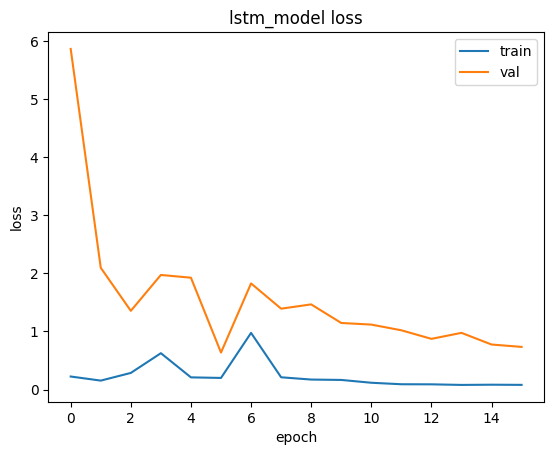

Fold 3:
  Train: index=[   0    1    2 ... 1524 1525 1526]
  Test:  index=[1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540
 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554
 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568
 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582
 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596
 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610
 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624
 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638
 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652
 1653 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666
 1667 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680
 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694
 1695 1696 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708
 17

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


48/48 - 1s - loss: 0.0750 - root_mean_squared_error: 0.2739 - val_loss: 0.8374 - val_root_mean_squared_error: 0.9151 - 1s/epoch - 28ms/step
Epoch 3/100
48/48 - 1s - loss: 0.0653 - root_mean_squared_error: 0.2556 - val_loss: 0.7055 - val_root_mean_squared_error: 0.8399 - 1s/epoch - 26ms/step
Epoch 4/100
48/48 - 1s - loss: 0.0643 - root_mean_squared_error: 0.2535 - val_loss: 0.7454 - val_root_mean_squared_error: 0.8634 - 1s/epoch - 22ms/step
Epoch 5/100
48/48 - 1s - loss: 0.0620 - root_mean_squared_error: 0.2490 - val_loss: 0.7736 - val_root_mean_squared_error: 0.8796 - 931ms/epoch - 19ms/step
Epoch 6/100
48/48 - 1s - loss: 0.0597 - root_mean_squared_error: 0.2444 - val_loss: 0.8484 - val_root_mean_squared_error: 0.9211 - 876ms/epoch - 18ms/step
Epoch 7/100
48/48 - 1s - loss: 0.0598 - root_mean_squared_error: 0.2445 - val_loss: 0.7871 - val_root_mean_squared_error: 0.8872 - 973ms/epoch - 20ms/step
Epoch 8/100
48/48 - 1s - loss: 0.0570 - root_mean_squared_error: 0.2388 - val_loss: 0.8506 

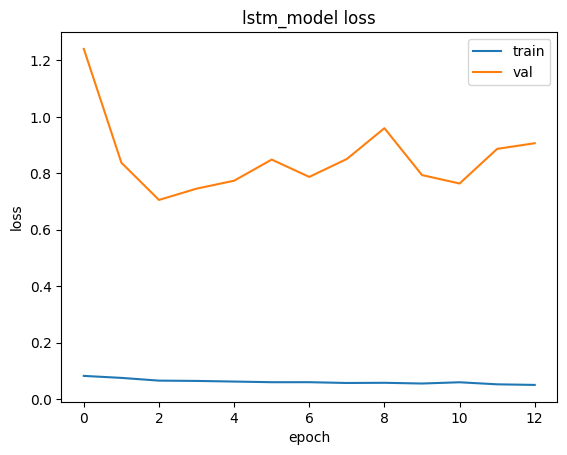

Fold 4:
  Train: index=[   0    1    2 ... 1905 1906 1907]
  Test:  index=[1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033
 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047
 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061
 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075
 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089
 20

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 - 3s - loss: 0.0503 - root_mean_squared_error: 0.2242 - val_loss: 0.6765 - val_root_mean_squared_error: 0.8225 - 3s/epoch - 48ms/step
Epoch 3/100
60/60 - 1s - loss: 0.0479 - root_mean_squared_error: 0.2189 - val_loss: 0.6429 - val_root_mean_squared_error: 0.8018 - 988ms/epoch - 16ms/step
Epoch 4/100
60/60 - 1s - loss: 0.0462 - root_mean_squared_error: 0.2149 - val_loss: 0.7166 - val_root_mean_squared_error: 0.8466 - 990ms/epoch - 17ms/step
Epoch 5/100
60/60 - 1s - loss: 0.0476 - root_mean_squared_error: 0.2181 - val_loss: 0.6041 - val_root_mean_squared_error: 0.7772 - 1s/epoch - 18ms/step
Epoch 6/100
60/60 - 1s - loss: 0.0452 - root_mean_squared_error: 0.2125 - val_loss: 0.6456 - val_root_mean_squared_error: 0.8035 - 1s/epoch - 17ms/step
Epoch 7/100
60/60 - 1s - loss: 0.0442 - root_mean_squared_error: 0.2101 - val_loss: 0.6338 - val_root_mean_squared_error: 0.7961 - 1s/epoch - 17ms/step
Epoch 8/100
60/60 - 1s - loss: 0.0434 - root_mean_squared_error: 0.2084 - val_loss: 0.7150 - v

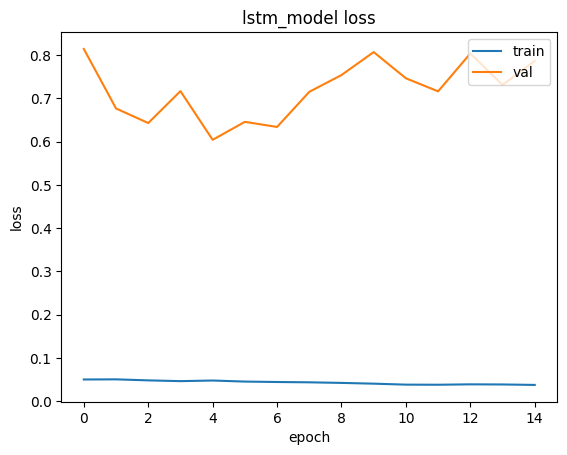

Fold 5:
  Train: index=[   0    1    2 ... 2286 2287 2288]
  Test:  index=[2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302
 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316
 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330
 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344
 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358
 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372
 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386
 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400
 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414
 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428
 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441 2442
 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453 2454 2455 2456
 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470
 24

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 - 1s - loss: 0.0354 - root_mean_squared_error: 0.1883 - val_loss: 0.7495 - val_root_mean_squared_error: 0.8658 - 1s/epoch - 15ms/step
Epoch 3/100
72/72 - 1s - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.7420 - val_root_mean_squared_error: 0.8614 - 984ms/epoch - 14ms/step
Epoch 4/100
72/72 - 1s - loss: 0.0344 - root_mean_squared_error: 0.1856 - val_loss: 0.9612 - val_root_mean_squared_error: 0.9804 - 1s/epoch - 14ms/step
Epoch 5/100
72/72 - 1s - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.8601 - val_root_mean_squared_error: 0.9274 - 1s/epoch - 16ms/step
Epoch 6/100
72/72 - 1s - loss: 0.0324 - root_mean_squared_error: 0.1799 - val_loss: 0.8425 - val_root_mean_squared_error: 0.9179 - 1s/epoch - 14ms/step
Epoch 7/100
72/72 - 1s - loss: 0.0330 - root_mean_squared_error: 0.1816 - val_loss: 0.8454 - val_root_mean_squared_error: 0.9195 - 1s/epoch - 17ms/step
Epoch 8/100
72/72 - 1s - loss: 0.0315 - root_mean_squared_error: 0.1776 - val_loss: 0.8216 - val_

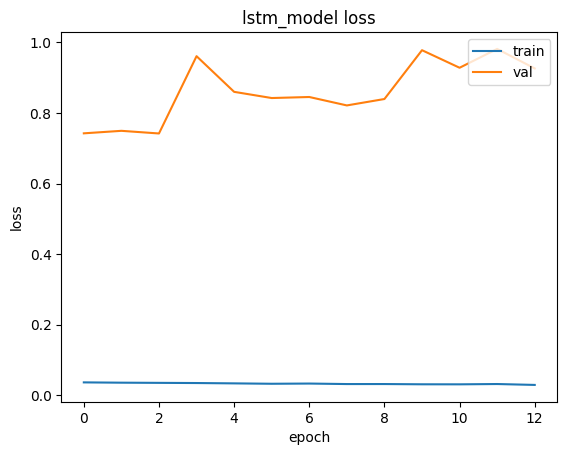

Fold 6:
  Train: index=[   0    1    2 ... 2667 2668 2669]
  Test:  index=[2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681 2682 2683
 2684 2685 2686 2687 2688 2689 2690 2691 2692 2693 2694 2695 2696 2697
 2698 2699 2700 2701 2702 2703 2704 2705 2706 2707 2708 2709 2710 2711
 2712 2713 2714 2715 2716 2717 2718 2719 2720 2721 2722 2723 2724 2725
 2726 2727 2728 2729 2730 2731 2732 2733 2734 2735 2736 2737 2738 2739
 2740 2741 2742 2743 2744 2745 2746 2747 2748 2749 2750 2751 2752 2753
 2754 2755 2756 2757 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767
 2768 2769 2770 2771 2772 2773 2774 2775 2776 2777 2778 2779 2780 2781
 2782 2783 2784 2785 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795
 2796 2797 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809
 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823
 2824 2825 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837
 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851
 28

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 - 1s - loss: 0.0271 - root_mean_squared_error: 0.1646 - val_loss: 1.2573 - val_root_mean_squared_error: 1.1213 - 1s/epoch - 12ms/step
Epoch 3/100
84/84 - 1s - loss: 0.0275 - root_mean_squared_error: 0.1659 - val_loss: 1.3471 - val_root_mean_squared_error: 1.1606 - 1s/epoch - 13ms/step
Epoch 4/100
84/84 - 2s - loss: 0.0266 - root_mean_squared_error: 0.1632 - val_loss: 1.0761 - val_root_mean_squared_error: 1.0373 - 2s/epoch - 22ms/step
Epoch 5/100
84/84 - 2s - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 1.3184 - val_root_mean_squared_error: 1.1482 - 2s/epoch - 20ms/step
Epoch 6/100
84/84 - 1s - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 1.5163 - val_root_mean_squared_error: 1.2314 - 1s/epoch - 15ms/step
Epoch 7/100
84/84 - 1s - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 3.6574 - val_root_mean_squared_error: 1.9124 - 1s/epoch - 17ms/step
Epoch 8/100
84/84 - 1s - loss: 0.0316 - root_mean_squared_error: 0.1778 - val_loss: 7.1056 - val_roo

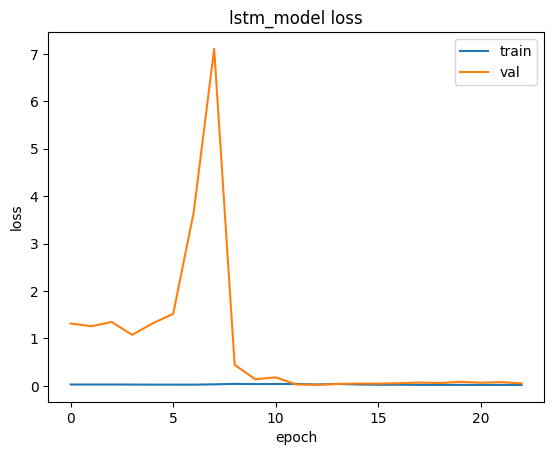

Fold 7:
  Train: index=[   0    1    2 ... 3048 3049 3050]
  Test:  index=[3051 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064
 3065 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078
 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092
 3093 3094 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106
 3107 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120
 3121 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131 3132 3133 3134
 3135 3136 3137 3138 3139 3140 3141 3142 3143 3144 3145 3146 3147 3148
 3149 3150 3151 3152 3153 3154 3155 3156 3157 3158 3159 3160 3161 3162
 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3175 3176
 3177 3178 3179 3180 3181 3182 3183 3184 3185 3186 3187 3188 3189 3190
 3191 3192 3193 3194 3195 3196 3197 3198 3199 3200 3201 3202 3203 3204
 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214 3215 3216 3217 3218
 3219 3220 3221 3222 3223 3224 3225 3226 3227 3228 3229 3230 3231 3232
 32

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 - 1s - loss: 0.0511 - root_mean_squared_error: 0.2261 - val_loss: 0.0968 - val_root_mean_squared_error: 0.3112 - 1s/epoch - 12ms/step
Epoch 3/100
96/96 - 1s - loss: 0.0943 - root_mean_squared_error: 0.3070 - val_loss: 0.1604 - val_root_mean_squared_error: 0.4005 - 1s/epoch - 12ms/step
Epoch 4/100
96/96 - 1s - loss: 0.0405 - root_mean_squared_error: 0.2012 - val_loss: 0.0566 - val_root_mean_squared_error: 0.2380 - 1s/epoch - 12ms/step
Epoch 5/100
96/96 - 1s - loss: 0.0257 - root_mean_squared_error: 0.1602 - val_loss: 0.0898 - val_root_mean_squared_error: 0.2996 - 1s/epoch - 14ms/step
Epoch 6/100
96/96 - 2s - loss: 0.2061 - root_mean_squared_error: 0.4540 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2035 - 2s/epoch - 17ms/step
Epoch 7/100
96/96 - 2s - loss: 0.0291 - root_mean_squared_error: 0.1705 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383 - 2s/epoch - 21ms/step
Epoch 8/100
96/96 - 1s - loss: 0.0251 - root_mean_squared_error: 0.1584 - val_loss: 0.0078 - val_roo

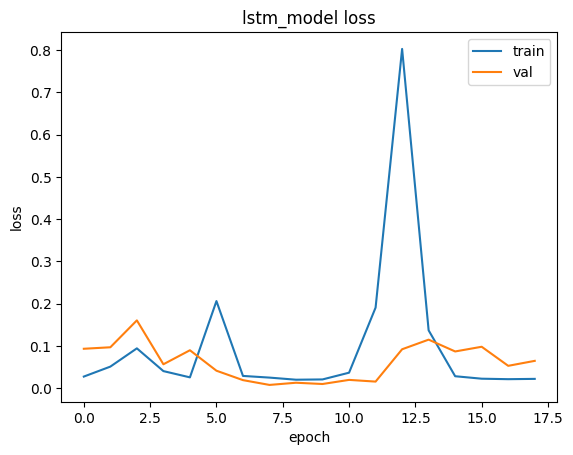

Fold 8:
  Train: index=[   0    1    2 ... 3429 3430 3431]
  Test:  index=[3432 3433 3434 3435 3436 3437 3438 3439 3440 3441 3442 3443 3444 3445
 3446 3447 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457 3458 3459
 3460 3461 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471 3472 3473
 3474 3475 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485 3486 3487
 3488 3489 3490 3491 3492 3493 3494 3495 3496 3497 3498 3499 3500 3501
 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515
 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529
 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543
 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557
 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571
 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585
 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599
 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613
 36

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


108/108 - 1s - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.1249 - val_root_mean_squared_error: 0.3534 - 1s/epoch - 11ms/step
Epoch 3/100
108/108 - 1s - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010 - 1s/epoch - 12ms/step
Epoch 4/100
108/108 - 1s - loss: 0.0192 - root_mean_squared_error: 0.1384 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833 - 1s/epoch - 13ms/step
Epoch 5/100
108/108 - 1s - loss: 0.0187 - root_mean_squared_error: 0.1369 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1012 - 1s/epoch - 11ms/step
Epoch 6/100
108/108 - 1s - loss: 0.0203 - root_mean_squared_error: 0.1423 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214 - 1s/epoch - 12ms/step
Epoch 7/100
108/108 - 1s - loss: 0.0305 - root_mean_squared_error: 0.1747 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332 - 1s/epoch - 11ms/step
Epoch 8/100
108/108 - 2s - loss: 0.0255 - root_mean_squared_error: 0.1597 - val_loss: 0.

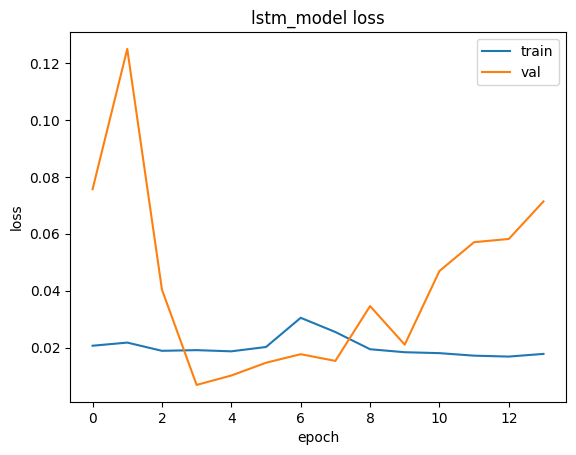

Fold 9:
  Train: index=[   0    1    2 ... 3810 3811 3812]
  Test:  index=[3813 3814 3815 3816 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826
 3827 3828 3829 3830 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840
 3841 3842 3843 3844 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854
 3855 3856 3857 3858 3859 3860 3861 3862 3863 3864 3865 3866 3867 3868
 3869 3870 3871 3872 3873 3874 3875 3876 3877 3878 3879 3880 3881 3882
 3883 3884 3885 3886 3887 3888 3889 3890 3891 3892 3893 3894 3895 3896
 3897 3898 3899 3900 3901 3902 3903 3904 3905 3906 3907 3908 3909 3910
 3911 3912 3913 3914 3915 3916 3917 3918 3919 3920 3921 3922 3923 3924
 3925 3926 3927 3928 3929 3930 3931 3932 3933 3934 3935 3936 3937 3938
 3939 3940 3941 3942 3943 3944 3945 3946 3947 3948 3949 3950 3951 3952
 3953 3954 3955 3956 3957 3958 3959 3960 3961 3962 3963 3964 3965 3966
 3967 3968 3969 3970 3971 3972 3973 3974 3975 3976 3977 3978 3979 3980
 3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 3991 3992 3993 3994
 39

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 - 1s - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365 - 1s/epoch - 11ms/step
Epoch 3/100
120/120 - 1s - loss: 0.0177 - root_mean_squared_error: 0.1332 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488 - 1s/epoch - 12ms/step
Epoch 4/100
120/120 - 1s - loss: 0.0168 - root_mean_squared_error: 0.1294 - val_loss: 6.2629e-04 - val_root_mean_squared_error: 0.0250 - 1s/epoch - 10ms/step
Epoch 5/100
120/120 - 1s - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411 - 1s/epoch - 10ms/step
Epoch 6/100
120/120 - 1s - loss: 0.0164 - root_mean_squared_error: 0.1283 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326 - 1s/epoch - 11ms/step
Epoch 7/100
120/120 - 1s - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468 - 1s/epoch - 12ms/step
Epoch 8/100
120/120 - 2s - loss: 0.0169 - root_mean_squared_error: 0.1298 - val_loss

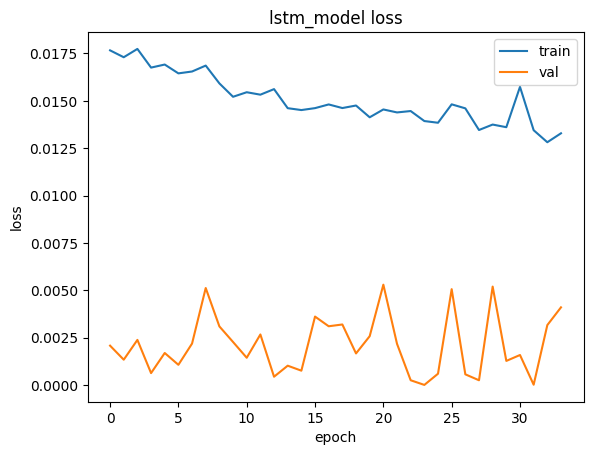

Train RMSE [0.2622482180595398, 0.1807154417037964, 0.14259149134159088, 0.10572546720504761, 0.07958663254976273, 0.07175034284591675, 0.057933300733566284, 0.05591542273759842, 0.03891034051775932, 0.06967407464981079]
Validation RMSE [2.14314341545105, 1.878054141998291, 0.8566974997520447, 0.9520435333251953, 0.8868807554244995, 0.9625225067138672, 0.22860851883888245, 0.2543559968471527, 0.2671346664428711, 0.06401173025369644]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_BackBlaze/lstm_10_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='10_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = X_train[:train_index[-1]]
  train_y = Y_train[:train_index[-1]]
  print(train_X.shape)
  val_X = X_train[test_index[-1]:]
  val_y = Y_train[test_index[-1]:]
  print(Y_train.shape)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  rmse_train.append(lstm_model.evaluate(train_X, train_y)[1])

  rmse_val.append(lstm_model.evaluate(val_X, val_y)[1])

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.10650507323443889
Validation RMSE 0.849345276504755


In [ ]:
lstm_model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 6ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715


[0.005108201410621405, 0.0714716836810112]

In [ ]:
Y_pred = lstm_model.predict(X_test)

15/15 [==============================] - 1s 6ms/step


In [ ]:
Y_pred.shape

(466, 5, 1)

In [ ]:
Y_test.shape

(466, 5, 1)

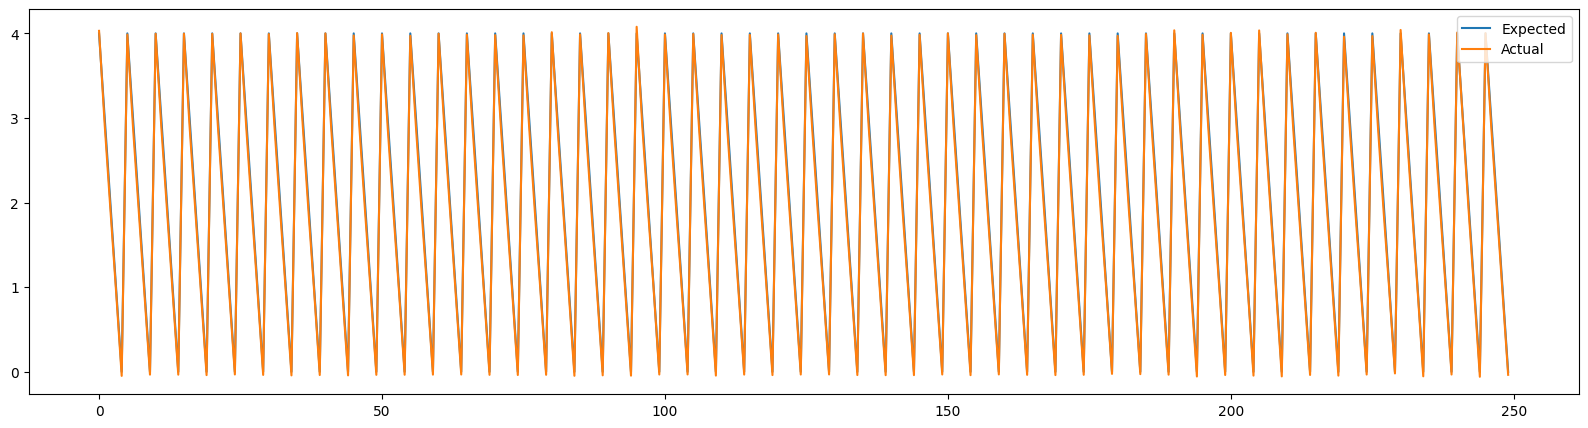

In [ ]:
fig = plt.figure()

expected = np.concatenate(Y_test[0: 50]).ravel()
actual = np.concatenate(Y_pred[0: 50]).ravel()
xc  = range(len(expected))
plt.plot(xc, expected, label='Expected')
plt.plot(xc, actual, label='Actual')
fig.set_size_inches(20, 5)
plt.legend()
plt.show()